In [37]:
import pickle
import os
import json
import colorthief
from tqdm import tqdm

In [38]:
from colorthief import ColorThief

In [39]:
import webcolors

In [40]:
from scipy.spatial import KDTree

In [41]:
from webcolors import (
    CSS3_HEX_TO_NAMES,
#     css3_hex_to_names,
    hex_to_rgb,
)

In [42]:
color_compiled = {}

In [43]:
with open('css_color_to_name.p','rb') as F:
    color_to_name = pickle.load(F)

In [44]:
inverted_css3 = {}
for key,value in CSS3_HEX_TO_NAMES.items():
    inverted_css3[value] = key

In [45]:
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index], [rgb_values[index][0],rgb_values[index][1],rgb_values[index][2]]

# Azure

In [46]:
with open('azure_detected_colors_full.p','rb') as F:
    azure_detected_colors = pickle.load(F)

In [47]:
for im_path, color_info in azure_detected_colors.items():
    im_name = im_path.split('/')[-1]
    if len(color_info) > 0:
        if color_info[0].lower() in set(color_to_name.values()):
            chosen_color = color_info[0]
        elif color_info[0] == 'Grey':
            chosen_color = 'gray'
        elif color_info[0] == 'Teal':
            chosen_color = 'green'
        else:
            print(color_info[0])
    
    if not im_name in color_compiled.keys():
        color_compiled[im_name] = {}
    
    color_compiled[im_name]['azure'] = chosen_color.lower()

# Google

In [48]:
for im in tqdm(os.listdir('static/dataset/api_outputs/')):
    im_info_path = os.path.join('static/dataset/api_outputs/', im)
    with open(im_info_path,'rb') as F:
        im_info = pickle.load(F)
    best_score = 0
    for color in im_info[1]:
        if color.score > best_score:
            best_score = color.score
            best_color = color.color
    
    rgb_tuple = int(best_color.red), int(best_color.green), int(best_color.blue)
    named_color,_ = convert_rgb_to_names(rgb_tuple)
    easy_color_name = color_to_name[inverted_css3[named_color]]
    
    im_name = im.replace('p','jpg')
    
    if not im_name in color_compiled.keys():
        color_compiled[im_name] = {}
    
    color_compiled[im_name]['google'] = easy_color_name

100%|██████████| 5000/5000 [00:08<00:00, 569.40it/s]


In [50]:
# color_compiled

# Histogram Method

In [51]:
with open('histogram_dominant_color.p','rb') as F:
    histogram_dominant_color = pickle.load(F)

In [52]:
for im_path, color_name in histogram_dominant_color.items():
    im_name = im_path.split('/')[-1]
    color_compiled[im_name]['histogram'] = color_name

In [54]:
# color_compiled

# Humans

In [16]:
with open('response_structure_labels.json','r') as F:
    response_structure_labels = json.load(F)

human_resps = []
for key, values in response_structure_labels.items():
    im_name = key.split('/')[-1]
    human_resps.append(im_name)
    multi_label_compiled[im_name]['humans'] = []
    for valkey in values.keys():
        valval = values[valkey]
        multi_label_compiled[im_name]['humans'].append(valval)

In [64]:
with open('../turing_test/per_image_human_colors.p','rb') as F:
    per_image_colors = pickle.load(F)

In [66]:
# per_image_colors

# Get oneWord for new images

In [33]:
# color_compiled

In [17]:
import pickle

In [18]:
imagenum = ['1','10','100','1000','1001','1003','1004','1006','1007','1008','1010','1011','1012','1014','1015','1017','1019','102','1020','1022','1024','1025','1026','1027','1028','103','1030','1031','1032','1034','1036','1039','1040','1042','1043','1044','1045','1047','1048','1049','1051','1052','1053','1054','1055','1056','1057','1059','106','1060','1062','1063','1064','1065','1066','1067','1068','1069','107','1070','1072','1073','1074','1075','1076','1077','1078','1079','108','1080','1082','1083','1085','1087','1088','1089','109','1090','1091','1092','1093','1095','1096','1098','1100','1102','1103','1105','1108','1109','111','1111','1112','1113','1114','1115','1118','1119','112','1120','1121','1122','1124','1125','1127','1128','1129','113','1130','1131','1132','1133','1134','1135','1137','1139','114','1140','1141','1142','1145','1146','1148','1149','1150','1151','1152','1153','1154','1155','1156','1157','116','1160','1161','1162','1163','1166','1167','1168','117','1171','1172','1173','1174','1175','1176','1177','1178','118','1181','1182','1184','1186','1188','1189','119','1190','1191','1192','1193','1194','1195','1197','1198','1199','12','120','122','125','126','127','128','129','13','130','132','133','134','135','136','137','138','139','14','140','141','142','143','144','146','148','15','150','151','152','153','156','157','158','159','16','160','162','166','167','171','172','173','174','175','177','179','18','182','185','186','187','188','19','192','196','197','2','20','201','202','204','205','208','209','21','210','211','212','213','214','215','217','218','219','221','222','223','224','225','226','227','228','229','23','230','231','232','235','236','238','24','240','242','243','244','245','247','248','250','251','253','254','255','256','257','261','263','264','265','267','268','269','271','273','276','279','28','283','284','285','286','288','289','29','290','292','294','295','296','297','298','299','3','30','300','301','302','303','304','305','306','307','308','310','311','312','313','314','315','316','317','318','321','322','323','324','325','326','327','328','329','330','332','333','334','335','337','339','34','342','343','345','346','347','351','352','353','354','355','356','357','358','36','360','361','363','364','365','367','368','369','370','371','373','374','375','376','378','38','380','381','382','383','386','387','389','390','391','392','393','394','395','396','399','4','40','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','418','419','42','420','421','422','424','426','427','428','429','43','430','431','432','433','435','436','437','438','439','44','440','441','442','444','445','446','448','45','450','451','452','455','458','46','461','463','464','465','466','467','470','472','473','474','475','476','478','481','482','483','485','489','49','490','491','493','494','495','496','497','498','499','5','50','500','501','502','503','505','506','507','508','51','510','512','513','514','515','516','517','519','520','521','522','523','524','525','526','528','53','530','531','532','533','534','536','538','539','54','540','541','542','543','544','545','546','547','548','549','550','552','553','554','555','557','558','56','560','561','562','563','564','565','568','569','570','571','572','574','575','576','577','58','582','583','584','585','587','588','589','590','591','594','595','596','597','598','599','6','60','601','604','605','606','607','608','610','611','612','613','614','615','617','618','619','62','620','621','622','623','624','625','626','627','629','631','632','633','634','636','641','642','646','647','648','65','651','652','653','654','655','656','657','66','662','663','664','665','666','667','668','669','67','671','672','673','674','675','678','682','683','684','685','687','689','690','691','692','693','694','696','697','698','699','70','701','702','703','704','705','707','708','71','711','712','713','714','716','717','718','72','720','721','722','724','725','726','727','728','729','73','730','731','734','735','736','737','738','74','741','742','744','749','750','751','754','755','756','757','758','759','76','761','762','763','764','766','768','769','77','770','771','772','773','774','775','776','777','779','78','780','782','784','786','787','788','789','790','791','792','793','794','795','796','797','798','799','8','80','800','801','805','806','809','81','811','812','815','816','817','818','819','82','820','824','825','826','827','829','83','830','831','832','833','835','836','837','838','839','84','840','841','842','843','844','845','846','847','848','849','85','850','851','852','854','855','856','858','859','86','860','864','865','867','868','87','870','873','874','875','876','877','878','879','88','880','882','883','885','887','888','889','89','891','892','894','895','896','897','898','899','90','900','901','902','905','908','91','910','911','912','913','914','915','916','917','918','919','920','921','922','923','924','925','926','927','929','93','930','931','934','938','939','94','941','942','943','944','945','946','947','948','949','95','950','951','952','954','957','958','96','960','962','965','966','967','968','969','97','970','971','973','974','975','978','979','98','983','984','985','986','987','989','990','991','993','994','996','997','998','999']

In [19]:
wrongWord = {'static/dataset/coco_val_set/2.jpg': 'fire hydrant', 'static/dataset/coco_val_set/5.jpg': 'vase', 'static/dataset/coco_val_set/7.jpg': 'stone', 'static/dataset/coco_val_set/9.jpg': 'door', 'static/dataset/coco_val_set/10.jpg': 'tile floor', 'static/dataset/coco_val_set/11.jpg': 'toilet', 'static/dataset/coco_val_set/12.jpg': 'fruit', 'static/dataset/coco_val_set/15.jpg': 'mountain', 'static/dataset/coco_val_set/16.jpg': 'cloth', 'static/dataset/coco_val_set/17.jpg': 'river', 'static/dataset/coco_val_set/18.jpg': 'skateboard', 'static/dataset/coco_val_set/19.jpg': 'book', 'static/dataset/coco_val_set/23.jpg': 'potted plant', 'static/dataset/coco_val_set/27.jpg': 'toilet', 'static/dataset/coco_val_set/28.jpg': 'laptop', 'static/dataset/coco_val_set/29.jpg': 'curtain', 'static/dataset/coco_val_set/30.jpg': 'bird', 'static/dataset/coco_val_set/32.jpg': 'couch', 'static/dataset/coco_val_set/33.jpg': 'tile floor', 'static/dataset/coco_val_set/34.jpg': 'orange', 'static/dataset/coco_val_set/35.jpg': 'sports ball', 'static/dataset/coco_val_set/36.jpg': 'fork', 'static/dataset/coco_val_set/38.jpg': 'bush', 'static/dataset/coco_val_set/39.jpg': 'sand', 'static/dataset/coco_val_set/42.jpg': 'baseball glove', 'static/dataset/coco_val_set/44.jpg': 'hat', 'static/dataset/coco_val_set/45.jpg': 'skyscraper', 'static/dataset/coco_val_set/46.jpg': 'traffic light', 'static/dataset/coco_val_set/48.jpg': 'stairs', 'static/dataset/coco_val_set/51.jpg': 'car', 'static/dataset/coco_val_set/52.jpg': 'tennis racket', 'static/dataset/coco_val_set/53.jpg': 'sea', 'static/dataset/coco_val_set/54.jpg': 'blender', 'static/dataset/coco_val_set/55.jpg': 'surfboard', 'static/dataset/coco_val_set/57.jpg': 'shoe', 'static/dataset/coco_val_set/58.jpg': 'railroad', 'static/dataset/coco_val_set/60.jpg': 'refrigerator', 'static/dataset/coco_val_set/62.jpg': 'sandwich', 'static/dataset/coco_val_set/63.jpg': 'tent', 'static/dataset/coco_val_set/64.jpg': 'spoon', 'static/dataset/coco_val_set/65.jpg': 'wood floor', 'static/dataset/coco_val_set/66.jpg': 'chair', 'static/dataset/coco_val_set/70.jpg': 'fruit', 'static/dataset/coco_val_set/71.jpg': 'cat', 'static/dataset/coco_val_set/72.jpg': 'desk', 'static/dataset/coco_val_set/73.jpg': 'baseball glove', 'static/dataset/coco_val_set/74.jpg': 'flower', 'static/dataset/coco_val_set/75.jpg': 'skyscraper', 'static/dataset/coco_val_set/76.jpg': 'napkin', 'static/dataset/coco_val_set/77.jpg': 'vase', 'static/dataset/coco_val_set/78.jpg': 'backpack', 'static/dataset/coco_val_set/79.jpg': 'window-blind', 'static/dataset/coco_val_set/80.jpg': 'street sign', 'static/dataset/coco_val_set/81.jpg': 'carrot', 'static/dataset/coco_val_set/82.jpg': 'river', 'static/dataset/coco_val_set/84.jpg': 'window', 'static/dataset/coco_val_set/85.jpg': 'toaster', 'static/dataset/coco_val_set/86.jpg': 'fruit', 'static/dataset/coco_val_set/87.jpg': 'couch', 'static/dataset/coco_val_set/88.jpg': 'person', 'static/dataset/coco_val_set/89.jpg': 'airplane', 'static/dataset/coco_val_set/90.jpg': 'toothbrush', 'static/dataset/coco_val_set/91.jpg': 'motorcycle', 'static/dataset/coco_val_set/92.jpg': 'snowboard', 'static/dataset/coco_val_set/93.jpg': 'bus', 'static/dataset/coco_val_set/94.jpg': 'mirror', 'static/dataset/coco_val_set/95.jpg': 'microwave', 'static/dataset/coco_val_set/96.jpg': 'bear', 'static/dataset/coco_val_set/97.jpg': 'dog', 'static/dataset/coco_val_set/99.jpg': 'fog', 'static/dataset/coco_val_set/100.jpg': 'blender', 'static/dataset/coco_val_set/101.jpg': 'kite', 'static/dataset/coco_val_set/103.jpg': 'clock', 'static/dataset/coco_val_set/104.jpg': 'playingfield', 'static/dataset/coco_val_set/105.jpg': 'cup', 'static/dataset/coco_val_set/111.jpg': 'snowboard', 'static/dataset/coco_val_set/112.jpg': 'branch', 'static/dataset/coco_val_set/113.jpg': 'suitcase', 'static/dataset/coco_val_set/114.jpg': 'knife', 'static/dataset/coco_val_set/115.jpg': 'tennis racket', 'static/dataset/coco_val_set/116.jpg': 'net', 'static/dataset/coco_val_set/117.jpg': 'donut', 'static/dataset/coco_val_set/119.jpg': 'kite', 'static/dataset/coco_val_set/120.jpg': 'leaves', 'static/dataset/coco_val_set/121.jpg': 'window', 'static/dataset/coco_val_set/123.jpg': 'chair', 'static/dataset/coco_val_set/124.jpg': 'tree', 'static/dataset/coco_val_set/126.jpg': 'toaster', 'static/dataset/coco_val_set/127.jpg': 'sheep', 'static/dataset/coco_val_set/128.jpg': 'bush', 'static/dataset/coco_val_set/130.jpg': 'sink', 'static/dataset/coco_val_set/131.jpg': 'truck', 'static/dataset/coco_val_set/132.jpg': 'bowl', 'static/dataset/coco_val_set/133.jpg': 'cat', 'static/dataset/coco_val_set/134.jpg': 'hair drier', 'static/dataset/coco_val_set/136.jpg': 'toaster', 'static/dataset/coco_val_set/137.jpg': 'hair drier', 'static/dataset/coco_val_set/138.jpg': 'road', 'static/dataset/coco_val_set/139.jpg': 'shoe', 'static/dataset/coco_val_set/142.jpg': 'handbag', 'static/dataset/coco_val_set/143.jpg': 'umbrella', 'static/dataset/coco_val_set/144.jpg': 'carrot', 'static/dataset/coco_val_set/145.jpg': 'stop sign', 'static/dataset/coco_val_set/148.jpg': 'cloth', 'static/dataset/coco_val_set/150.jpg': 'dog', 'static/dataset/coco_val_set/152.jpg': 'snow', 'static/dataset/coco_val_set/154.jpg': 'leaves', 'static/dataset/coco_val_set/158.jpg': 'platform', 'static/dataset/coco_val_set/159.jpg': 'shelf', 'static/dataset/coco_val_set/160.jpg': 'snow', 'static/dataset/coco_val_set/162.jpg': 'tv', 'static/dataset/coco_val_set/164.jpg': 'stairs', 'static/dataset/coco_val_set/165.jpg': 'kite', 'static/dataset/coco_val_set/167.jpg': 'car', 'static/dataset/coco_val_set/168.jpg': 'skyscraper', 'static/dataset/coco_val_set/169.jpg': 'cupboard', 'static/dataset/coco_val_set/172.jpg': 'stop sign', 'static/dataset/coco_val_set/173.jpg': 'blanket', 'static/dataset/coco_val_set/174.jpg': 'motorcycle', 'static/dataset/coco_val_set/176.jpg': 'baseball bat', 'static/dataset/coco_val_set/179.jpg': 'book', 'static/dataset/coco_val_set/180.jpg': 'stairs', 'static/dataset/coco_val_set/183.jpg': 'remote', 'static/dataset/coco_val_set/184.jpg': 'dining table', 'static/dataset/coco_val_set/186.jpg': 'laptop', 'static/dataset/coco_val_set/188.jpg': 'carrot', 'static/dataset/coco_val_set/190.jpg': 'bush', 'static/dataset/coco_val_set/191.jpg': 'desk', 'static/dataset/coco_val_set/194.jpg': 'fork', 'static/dataset/coco_val_set/195.jpg': 'sports ball', 'static/dataset/coco_val_set/196.jpg': 'refrigerator', 'static/dataset/coco_val_set/202.jpg': 'carrot', 'static/dataset/coco_val_set/203.jpg': 'tree', 'static/dataset/coco_val_set/204.jpg': 'spoon', 'static/dataset/coco_val_set/205.jpg': 'stop sign', 'static/dataset/coco_val_set/207.jpg': 'table', 'static/dataset/coco_val_set/208.jpg': 'knife', 'static/dataset/coco_val_set/209.jpg': 'plant', 'static/dataset/coco_val_set/210.jpg': 'net', 'static/dataset/coco_val_set/211.jpg': 'knife', 'static/dataset/coco_val_set/212.jpg': 'traffic light', 'static/dataset/coco_val_set/216.jpg': 'sea', 'static/dataset/coco_val_set/217.jpg': 'hot dog', 'static/dataset/coco_val_set/218.jpg': 'apple', 'static/dataset/coco_val_set/219.jpg': 'fog', 'static/dataset/coco_val_set/222.jpg': 'cup', 'static/dataset/coco_val_set/223.jpg': 'cat', 'static/dataset/coco_val_set/224.jpg': 'elephant', 'static/dataset/coco_val_set/225.jpg': 'donut', 'static/dataset/coco_val_set/227.jpg': 'snowboard', 'static/dataset/coco_val_set/229.jpg': 'skateboard', 'static/dataset/coco_val_set/230.jpg': 'zebra', 'static/dataset/coco_val_set/231.jpg': 'cup', 'static/dataset/coco_val_set/233.jpg': 'flower', 'static/dataset/coco_val_set/234.jpg': 'umbrella', 'static/dataset/coco_val_set/235.jpg': 'handbag', 'static/dataset/coco_val_set/236.jpg': 'giraffe', 'static/dataset/coco_val_set/237.jpg': 'airplane', 'static/dataset/coco_val_set/239.jpg': 'apple', 'static/dataset/coco_val_set/240.jpg': 'snowboard', 'static/dataset/coco_val_set/241.jpg': 'cup', 'static/dataset/coco_val_set/242.jpg': 'banana', 'static/dataset/coco_val_set/243.jpg': 'stairs', 'static/dataset/coco_val_set/246.jpg': 'baseball glove', 'static/dataset/coco_val_set/247.jpg': 'house', 'static/dataset/coco_val_set/248.jpg': 'fruit', 'static/dataset/coco_val_set/249.jpg': 'counter', 'static/dataset/coco_val_set/252.jpg': 'motorcycle', 'static/dataset/coco_val_set/253.jpg': 'truck', 'static/dataset/coco_val_set/255.jpg': 'truck', 'static/dataset/coco_val_set/256.jpg': 'sheep', 'static/dataset/coco_val_set/258.jpg': 'elephant', 'static/dataset/coco_val_set/259.jpg': 'road', 'static/dataset/coco_val_set/260.jpg': 'airplane', 'static/dataset/coco_val_set/263.jpg': 'giraffe', 'static/dataset/coco_val_set/264.jpg': 'carrot', 'static/dataset/coco_val_set/265.jpg': 'skis', 'static/dataset/coco_val_set/266.jpg': 'curtain', 'static/dataset/coco_val_set/267.jpg': 'mouse', 'static/dataset/coco_val_set/268.jpg': 'straw', 'static/dataset/coco_val_set/273.jpg': 'cow', 'static/dataset/coco_val_set/275.jpg': 'broccoli', 'static/dataset/coco_val_set/276.jpg': 'bicycle', 'static/dataset/coco_val_set/277.jpg': 'banana', 'static/dataset/coco_val_set/278.jpg': 'table', 'static/dataset/coco_val_set/280.jpg': 'toilet', 'static/dataset/coco_val_set/281.jpg': 'mirror', 'static/dataset/coco_val_set/282.jpg': 'laptop', 'static/dataset/coco_val_set/283.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/284.jpg': 'baseball glove', 'static/dataset/coco_val_set/285.jpg': 'giraffe', 'static/dataset/coco_val_set/286.jpg': 'bear', 'static/dataset/coco_val_set/289.jpg': 'motorcycle', 'static/dataset/coco_val_set/292.jpg': 'surfboard', 'static/dataset/coco_val_set/293.jpg': 'scissors', 'static/dataset/coco_val_set/294.jpg': 'snowboard', 'static/dataset/coco_val_set/295.jpg': 'frisbee', 'static/dataset/coco_val_set/296.jpg': 'plant', 'static/dataset/coco_val_set/297.jpg': 'cell phone', 'static/dataset/coco_val_set/298.jpg': 'refrigerator', 'static/dataset/coco_val_set/302.jpg': 'couch', 'static/dataset/coco_val_set/304.jpg': 'sandwich', 'static/dataset/coco_val_set/305.jpg': 'fire hydrant', 'static/dataset/coco_val_set/306.jpg': 'traffic light', 'static/dataset/coco_val_set/309.jpg': 'backpack', 'static/dataset/coco_val_set/310.jpg': 'frisbee', 'static/dataset/coco_val_set/311.jpg': 'napkin', 'static/dataset/coco_val_set/312.jpg': 'bicycle', 'static/dataset/coco_val_set/314.jpg': 'cell phone', 'static/dataset/coco_val_set/315.jpg': 'stairs', 'static/dataset/coco_val_set/320.jpg': 'house', 'static/dataset/coco_val_set/321.jpg': 'blender', 'static/dataset/coco_val_set/322.jpg': 'stone', 'static/dataset/coco_val_set/324.jpg': 'hot dog', 'static/dataset/coco_val_set/325.jpg': 'bowl', 'static/dataset/coco_val_set/326.jpg': 'flower', 'static/dataset/coco_val_set/327.jpg': 'traffic light', 'static/dataset/coco_val_set/328.jpg': 'carrot', 'static/dataset/coco_val_set/331.jpg': 'orange', 'static/dataset/coco_val_set/335.jpg': 'hair brush', 'static/dataset/coco_val_set/336.jpg': 'skyscraper', 'static/dataset/coco_val_set/338.jpg': 'tent', 'static/dataset/coco_val_set/340.jpg': 'sheep', 'static/dataset/coco_val_set/341.jpg': 'elephant', 'static/dataset/coco_val_set/342.jpg': 'baseball glove', 'static/dataset/coco_val_set/345.jpg': 'toaster', 'static/dataset/coco_val_set/346.jpg': 'window', 'static/dataset/coco_val_set/347.jpg': 'counter', 'static/dataset/coco_val_set/348.jpg': 'fruit', 'static/dataset/coco_val_set/349.jpg': 'couch', 'static/dataset/coco_val_set/350.jpg': 'parking meter', 'static/dataset/coco_val_set/351.jpg': 'hair drier', 'static/dataset/coco_val_set/352.jpg': 'train', 'static/dataset/coco_val_set/354.jpg': 'cake', 'static/dataset/coco_val_set/355.jpg': 'bridge', 'static/dataset/coco_val_set/358.jpg': 'hat', 'static/dataset/coco_val_set/359.jpg': 'grass', 'static/dataset/coco_val_set/360.jpg': 'road', 'static/dataset/coco_val_set/361.jpg': 'umbrella', 'static/dataset/coco_val_set/362.jpg': 'potted plant', 'static/dataset/coco_val_set/365.jpg': 'sandwich', 'static/dataset/coco_val_set/367.jpg': 'napkin', 'static/dataset/coco_val_set/368.jpg': 'hair drier', 'static/dataset/coco_val_set/369.jpg': 'cell phone', 'static/dataset/coco_val_set/370.jpg': 'branch', 'static/dataset/coco_val_set/371.jpg': 'snowboard', 'static/dataset/coco_val_set/373.jpg': 'dog', 'static/dataset/coco_val_set/374.jpg': 'counter', 'static/dataset/coco_val_set/375.jpg': 'truck', 'static/dataset/coco_val_set/376.jpg': 'potted plant', 'static/dataset/coco_val_set/379.jpg': 'umbrella', 'static/dataset/coco_val_set/380.jpg': 'bed', 'static/dataset/coco_val_set/381.jpg': 'pizza', 'static/dataset/coco_val_set/383.jpg': 'pizza', 'static/dataset/coco_val_set/385.jpg': 'bear', 'static/dataset/coco_val_set/386.jpg': 'microwave', 'static/dataset/coco_val_set/387.jpg': 'fork', 'static/dataset/coco_val_set/388.jpg': 'sea', 'static/dataset/coco_val_set/390.jpg': 'car', 'static/dataset/coco_val_set/392.jpg': 'cup', 'static/dataset/coco_val_set/393.jpg': 'cake', 'static/dataset/coco_val_set/394.jpg': 'train', 'static/dataset/coco_val_set/396.jpg': 'pillow', 'static/dataset/coco_val_set/398.jpg': 'sink', 'static/dataset/coco_val_set/405.jpg': 'street sign', 'static/dataset/coco_val_set/407.jpg': 'straw', 'static/dataset/coco_val_set/408.jpg': 'bottle', 'static/dataset/coco_val_set/409.jpg': 'book', 'static/dataset/coco_val_set/410.jpg': 'mountain', 'static/dataset/coco_val_set/411.jpg': 'baseball bat', 'static/dataset/coco_val_set/414.jpg': 'clouds', 'static/dataset/coco_val_set/415.jpg': 'snow', 'static/dataset/coco_val_set/416.jpg': 'cake', 'static/dataset/coco_val_set/417.jpg': 'hair brush', 'static/dataset/coco_val_set/418.jpg': 'book', 'static/dataset/coco_val_set/419.jpg': 'truck', 'static/dataset/coco_val_set/420.jpg': 'knife', 'static/dataset/coco_val_set/423.jpg': 'tv', 'static/dataset/coco_val_set/426.jpg': 'branch', 'static/dataset/coco_val_set/427.jpg': 'teddy bear', 'static/dataset/coco_val_set/430.jpg': 'dining table', 'static/dataset/coco_val_set/431.jpg': 'bush', 'static/dataset/coco_val_set/434.jpg': 'blanket', 'static/dataset/coco_val_set/437.jpg': 'blanket', 'static/dataset/coco_val_set/438.jpg': 'bed', 'static/dataset/coco_val_set/439.jpg': 'snowboard', 'static/dataset/coco_val_set/440.jpg': 'cat', 'static/dataset/coco_val_set/441.jpg': 'baseball glove', 'static/dataset/coco_val_set/442.jpg': 'apple', 'static/dataset/coco_val_set/444.jpg': 'mouse', 'static/dataset/coco_val_set/446.jpg': 'door', 'static/dataset/coco_val_set/448.jpg': 'skateboard', 'static/dataset/coco_val_set/450.jpg': 'book', 'static/dataset/coco_val_set/451.jpg': 'house', 'static/dataset/coco_val_set/452.jpg': 'bicycle', 'static/dataset/coco_val_set/453.jpg': 'fruit', 'static/dataset/coco_val_set/454.jpg': 'baseball bat', 'static/dataset/coco_val_set/455.jpg': 'sink', 'static/dataset/coco_val_set/456.jpg': 'bear', 'static/dataset/coco_val_set/457.jpg': 'rock', 'static/dataset/coco_val_set/458.jpg': 'leaves', 'static/dataset/coco_val_set/459.jpg': 'shoe', 'static/dataset/coco_val_set/460.jpg': 'donut', 'static/dataset/coco_val_set/461.jpg': 'door', 'static/dataset/coco_val_set/462.jpg': 'chair', 'static/dataset/coco_val_set/464.jpg': 'spoon', 'static/dataset/coco_val_set/467.jpg': 'book', 'static/dataset/coco_val_set/470.jpg': 'backpack', 'static/dataset/coco_val_set/471.jpg': 'bridge', 'static/dataset/coco_val_set/472.jpg': 'plant', 'static/dataset/coco_val_set/474.jpg': 'scissors', 'static/dataset/coco_val_set/475.jpg': 'cat', 'static/dataset/coco_val_set/476.jpg': 'stairs', 'static/dataset/coco_val_set/479.jpg': 'dog', 'static/dataset/coco_val_set/480.jpg': 'truck', 'static/dataset/coco_val_set/483.jpg': 'carpet', 'static/dataset/coco_val_set/488.jpg': 'knife', 'static/dataset/coco_val_set/489.jpg': 'fog', 'static/dataset/coco_val_set/491.jpg': 'clock', 'static/dataset/coco_val_set/492.jpg': 'oven', 'static/dataset/coco_val_set/493.jpg': 'parking meter', 'static/dataset/coco_val_set/494.jpg': 'blender', 'static/dataset/coco_val_set/496.jpg': 'eye glasses', 'static/dataset/coco_val_set/497.jpg': 'broccoli', 'static/dataset/coco_val_set/498.jpg': 'clouds', 'static/dataset/coco_val_set/499.jpg': 'branch', 'static/dataset/coco_val_set/501.jpg': 'stairs', 'static/dataset/coco_val_set/503.jpg': 'playingfield', 'static/dataset/coco_val_set/505.jpg': 'frisbee', 'static/dataset/coco_val_set/506.jpg': 'window-blind', 'static/dataset/coco_val_set/507.jpg': 'remote', 'static/dataset/coco_val_set/508.jpg': 'hair drier', 'static/dataset/coco_val_set/509.jpg': 'street sign', 'static/dataset/coco_val_set/510.jpg': 'banner', 'static/dataset/coco_val_set/511.jpg': 'apple', 'static/dataset/coco_val_set/513.jpg': 'tile floor', 'static/dataset/coco_val_set/514.jpg': 'parking meter', 'static/dataset/coco_val_set/515.jpg': 'road', 'static/dataset/coco_val_set/516.jpg': 'bus', 'static/dataset/coco_val_set/518.jpg': 'fire hydrant', 'static/dataset/coco_val_set/520.jpg': 'kite', 'static/dataset/coco_val_set/523.jpg': 'platform', 'static/dataset/coco_val_set/525.jpg': 'pavement', 'static/dataset/coco_val_set/528.jpg': 'hair drier', 'static/dataset/coco_val_set/529.jpg': 'airplane', 'static/dataset/coco_val_set/531.jpg': 'elephant', 'static/dataset/coco_val_set/532.jpg': 'bus', 'static/dataset/coco_val_set/534.jpg': 'straw', 'static/dataset/coco_val_set/536.jpg': 'carpet', 'static/dataset/coco_val_set/537.jpg': 'cell phone', 'static/dataset/coco_val_set/538.jpg': 'keyboard', 'static/dataset/coco_val_set/539.jpg': 'keyboard', 'static/dataset/coco_val_set/541.jpg': 'leaves', 'static/dataset/coco_val_set/543.jpg': 'window', 'static/dataset/coco_val_set/545.jpg': 'playingfield', 'static/dataset/coco_val_set/548.jpg': 'carrot', 'static/dataset/coco_val_set/549.jpg': 'plate', 'static/dataset/coco_val_set/550.jpg': 'couch', 'static/dataset/coco_val_set/552.jpg': 'banner', 'static/dataset/coco_val_set/553.jpg': 'potted plant', 'static/dataset/coco_val_set/554.jpg': 'sink', 'static/dataset/coco_val_set/558.jpg': 'bed', 'static/dataset/coco_val_set/560.jpg': 'horse', 'static/dataset/coco_val_set/561.jpg': 'car', 'static/dataset/coco_val_set/562.jpg': 'truck', 'static/dataset/coco_val_set/564.jpg': 'table', 'static/dataset/coco_val_set/565.jpg': 'shelf', 'static/dataset/coco_val_set/566.jpg': 'counter', 'static/dataset/coco_val_set/568.jpg': 'table', 'static/dataset/coco_val_set/570.jpg': 'cloth', 'static/dataset/coco_val_set/571.jpg': 'straw', 'static/dataset/coco_val_set/572.jpg': 'skateboard', 'static/dataset/coco_val_set/573.jpg': 'truck', 'static/dataset/coco_val_set/574.jpg': 'cloth', 'static/dataset/coco_val_set/575.jpg': 'bridge', 'static/dataset/coco_val_set/578.jpg': 'clock', 'static/dataset/coco_val_set/579.jpg': 'bridge', 'static/dataset/coco_val_set/580.jpg': 'zebra', 'static/dataset/coco_val_set/581.jpg': 'mouse', 'static/dataset/coco_val_set/583.jpg': 'net', 'static/dataset/coco_val_set/584.jpg': 'bus', 'static/dataset/coco_val_set/585.jpg': 'fog', 'static/dataset/coco_val_set/587.jpg': 'sports ball', 'static/dataset/coco_val_set/588.jpg': 'sandwich', 'static/dataset/coco_val_set/590.jpg': 'train', 'static/dataset/coco_val_set/594.jpg': 'keyboard', 'static/dataset/coco_val_set/595.jpg': 'donut', 'static/dataset/coco_val_set/597.jpg': 'sink', 'static/dataset/coco_val_set/599.jpg': 'teddy bear', 'static/dataset/coco_val_set/600.jpg': 'skis', 'static/dataset/coco_val_set/601.jpg': 'vase', 'static/dataset/coco_val_set/602.jpg': 'stone', 'static/dataset/coco_val_set/604.jpg': 'desk', 'static/dataset/coco_val_set/606.jpg': 'clouds', 'static/dataset/coco_val_set/608.jpg': 'street sign', 'static/dataset/coco_val_set/609.jpg': 'banner', 'static/dataset/coco_val_set/612.jpg': 'baseball glove', 'static/dataset/coco_val_set/613.jpg': 'hot dog', 'static/dataset/coco_val_set/616.jpg': 'snow', 'static/dataset/coco_val_set/622.jpg': 'leaves', 'static/dataset/coco_val_set/624.jpg': 'flower', 'static/dataset/coco_val_set/628.jpg': 'carpet', 'static/dataset/coco_val_set/629.jpg': 'napkin', 'static/dataset/coco_val_set/631.jpg': 'pillow', 'static/dataset/coco_val_set/632.jpg': 'window', 'static/dataset/coco_val_set/635.jpg': 'branch', 'static/dataset/coco_val_set/636.jpg': 'banner', 'static/dataset/coco_val_set/637.jpg': 'hat', 'static/dataset/coco_val_set/638.jpg': 'straw', 'static/dataset/coco_val_set/639.jpg': 'baseball glove', 'static/dataset/coco_val_set/641.jpg': 'counter', 'static/dataset/coco_val_set/644.jpg': 'couch', 'static/dataset/coco_val_set/645.jpg': 'house', 'static/dataset/coco_val_set/646.jpg': 'remote', 'static/dataset/coco_val_set/647.jpg': 'cage', 'static/dataset/coco_val_set/648.jpg': 'toothbrush', 'static/dataset/coco_val_set/649.jpg': 'cupboard', 'static/dataset/coco_val_set/650.jpg': 'cell phone', 'static/dataset/coco_val_set/651.jpg': 'window-blind', 'static/dataset/coco_val_set/654.jpg': 'tennis racket', 'static/dataset/coco_val_set/655.jpg': 'cup', 'static/dataset/coco_val_set/656.jpg': 'leaves', 'static/dataset/coco_val_set/657.jpg': 'fire hydrant', 'static/dataset/coco_val_set/661.jpg': 'flower', 'static/dataset/coco_val_set/664.jpg': 'cage', 'static/dataset/coco_val_set/668.jpg': 'handbag', 'static/dataset/coco_val_set/669.jpg': 'book', 'static/dataset/coco_val_set/670.jpg': 'wood floor', 'static/dataset/coco_val_set/672.jpg': 'sea', 'static/dataset/coco_val_set/674.jpg': 'potted plant', 'static/dataset/coco_val_set/676.jpg': 'stairs', 'static/dataset/coco_val_set/677.jpg': 'knife', 'static/dataset/coco_val_set/678.jpg': 'keyboard', 'static/dataset/coco_val_set/681.jpg': 'sports ball', 'static/dataset/coco_val_set/682.jpg': 'knife', 'static/dataset/coco_val_set/683.jpg': 'branch', 'static/dataset/coco_val_set/684.jpg': 'cat', 'static/dataset/coco_val_set/686.jpg': 'carrot', 'static/dataset/coco_val_set/687.jpg': 'frisbee', 'static/dataset/coco_val_set/689.jpg': 'stairs', 'static/dataset/coco_val_set/691.jpg': 'vase', 'static/dataset/coco_val_set/692.jpg': 'horse', 'static/dataset/coco_val_set/693.jpg': 'pillow', 'static/dataset/coco_val_set/694.jpg': 'cow', 'static/dataset/coco_val_set/696.jpg': 'branch', 'static/dataset/coco_val_set/697.jpg': 'suitcase', 'static/dataset/coco_val_set/700.jpg': 'zebra', 'static/dataset/coco_val_set/701.jpg': 'window-blind', 'static/dataset/coco_val_set/702.jpg': 'tree', 'static/dataset/coco_val_set/703.jpg': 'clock', 'static/dataset/coco_val_set/704.jpg': 'door', 'static/dataset/coco_val_set/706.jpg': 'branch', 'static/dataset/coco_val_set/708.jpg': 'clock', 'static/dataset/coco_val_set/714.jpg': 'truck', 'static/dataset/coco_val_set/715.jpg': 'grass', 'static/dataset/coco_val_set/717.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/719.jpg': 'banana', 'static/dataset/coco_val_set/720.jpg': 'toilet', 'static/dataset/coco_val_set/721.jpg': 'fork', 'static/dataset/coco_val_set/722.jpg': 'toaster', 'static/dataset/coco_val_set/723.jpg': 'cupboard', 'static/dataset/coco_val_set/724.jpg': 'fog', 'static/dataset/coco_val_set/725.jpg': 'platform', 'static/dataset/coco_val_set/726.jpg': 'road', 'static/dataset/coco_val_set/727.jpg': 'road', 'static/dataset/coco_val_set/728.jpg': 'grass', 'static/dataset/coco_val_set/730.jpg': 'elephant', 'static/dataset/coco_val_set/731.jpg': 'cat', 'static/dataset/coco_val_set/732.jpg': 'clouds', 'static/dataset/coco_val_set/734.jpg': 'boat', 'static/dataset/coco_val_set/735.jpg': 'tent', 'static/dataset/coco_val_set/736.jpg': 'curtain', 'static/dataset/coco_val_set/737.jpg': 'hair drier', 'static/dataset/coco_val_set/738.jpg': 'window', 'static/dataset/coco_val_set/739.jpg': 'bush', 'static/dataset/coco_val_set/742.jpg': 'napkin', 'static/dataset/coco_val_set/743.jpg': 'door', 'static/dataset/coco_val_set/744.jpg': 'remote', 'static/dataset/coco_val_set/745.jpg': 'hair brush', 'static/dataset/coco_val_set/748.jpg': 'couch', 'static/dataset/coco_val_set/749.jpg': 'tent', 'static/dataset/coco_val_set/752.jpg': 'toaster', 'static/dataset/coco_val_set/754.jpg': 'branch', 'static/dataset/coco_val_set/755.jpg': 'teddy bear', 'static/dataset/coco_val_set/756.jpg': 'laptop', 'static/dataset/coco_val_set/757.jpg': 'hot dog', 'static/dataset/coco_val_set/758.jpg': 'train', 'static/dataset/coco_val_set/760.jpg': 'bottle', 'static/dataset/coco_val_set/761.jpg': 'carpet', 'static/dataset/coco_val_set/762.jpg': 'snowboard', 'static/dataset/coco_val_set/763.jpg': 'flower', 'static/dataset/coco_val_set/764.jpg': 'sandwich', 'static/dataset/coco_val_set/766.jpg': 'dining table', 'static/dataset/coco_val_set/769.jpg': 'hair drier', 'static/dataset/coco_val_set/772.jpg': 'wine glass', 'static/dataset/coco_val_set/774.jpg': 'salad', 'static/dataset/coco_val_set/775.jpg': 'cow', 'static/dataset/coco_val_set/776.jpg': 'blanket', 'static/dataset/coco_val_set/777.jpg': 'blender', 'static/dataset/coco_val_set/780.jpg': 'laptop', 'static/dataset/coco_val_set/783.jpg': 'blender', 'static/dataset/coco_val_set/784.jpg': 'broccoli', 'static/dataset/coco_val_set/785.jpg': 'window', 'static/dataset/coco_val_set/786.jpg': 'toothbrush', 'static/dataset/coco_val_set/787.jpg': 'sea', 'static/dataset/coco_val_set/791.jpg': 'skis', 'static/dataset/coco_val_set/792.jpg': 'branch', 'static/dataset/coco_val_set/793.jpg': 'fruit', 'static/dataset/coco_val_set/794.jpg': 'tree', 'static/dataset/coco_val_set/796.jpg': 'zebra', 'static/dataset/coco_val_set/797.jpg': 'frisbee', 'static/dataset/coco_val_set/801.jpg': 'cow', 'static/dataset/coco_val_set/802.jpg': 'traffic light', 'static/dataset/coco_val_set/803.jpg': 'tennis racket', 'static/dataset/coco_val_set/805.jpg': 'cell phone', 'static/dataset/coco_val_set/807.jpg': 'clouds', 'static/dataset/coco_val_set/808.jpg': 'cupboard', 'static/dataset/coco_val_set/810.jpg': 'clock', 'static/dataset/coco_val_set/811.jpg': 'dining table', 'static/dataset/coco_val_set/812.jpg': 'shoe', 'static/dataset/coco_val_set/813.jpg': 'skateboard', 'static/dataset/coco_val_set/815.jpg': 'airplane', 'static/dataset/coco_val_set/817.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/818.jpg': 'skyscraper', 'static/dataset/coco_val_set/819.jpg': 'branch', 'static/dataset/coco_val_set/822.jpg': 'bird', 'static/dataset/coco_val_set/823.jpg': 'toaster', 'static/dataset/coco_val_set/824.jpg': 'remote', 'static/dataset/coco_val_set/826.jpg': 'fire hydrant', 'static/dataset/coco_val_set/828.jpg': 'book', 'static/dataset/coco_val_set/830.jpg': 'remote', 'static/dataset/coco_val_set/833.jpg': 'window', 'static/dataset/coco_val_set/834.jpg': 'river', 'static/dataset/coco_val_set/835.jpg': 'bowl', 'static/dataset/coco_val_set/838.jpg': 'house', 'static/dataset/coco_val_set/839.jpg': 'suitcase', 'static/dataset/coco_val_set/841.jpg': 'skateboard', 'static/dataset/coco_val_set/842.jpg': 'wood floor', 'static/dataset/coco_val_set/843.jpg': 'keyboard', 'static/dataset/coco_val_set/846.jpg': 'table', 'static/dataset/coco_val_set/849.jpg': 'wine glass', 'static/dataset/coco_val_set/852.jpg': 'rock', 'static/dataset/coco_val_set/854.jpg': 'bench', 'static/dataset/coco_val_set/855.jpg': 'sink', 'static/dataset/coco_val_set/856.jpg': 'handbag', 'static/dataset/coco_val_set/857.jpg': 'platform', 'static/dataset/coco_val_set/858.jpg': 'cup', 'static/dataset/coco_val_set/860.jpg': 'carpet', 'static/dataset/coco_val_set/862.jpg': 'zebra', 'static/dataset/coco_val_set/863.jpg': 'knife', 'static/dataset/coco_val_set/864.jpg': 'vase', 'static/dataset/coco_val_set/865.jpg': 'stop sign', 'static/dataset/coco_val_set/866.jpg': 'door', 'static/dataset/coco_val_set/867.jpg': 'banana', 'static/dataset/coco_val_set/868.jpg': 'tennis racket', 'static/dataset/coco_val_set/870.jpg': 'blender', 'static/dataset/coco_val_set/872.jpg': 'sheep', 'static/dataset/coco_val_set/873.jpg': 'traffic light', 'static/dataset/coco_val_set/874.jpg': 'net', 'static/dataset/coco_val_set/875.jpg': 'plant', 'static/dataset/coco_val_set/877.jpg': 'stairs', 'static/dataset/coco_val_set/878.jpg': 'curtain', 'static/dataset/coco_val_set/882.jpg': 'bird', 'static/dataset/coco_val_set/884.jpg': 'backpack', 'static/dataset/coco_val_set/885.jpg': 'surfboard', 'static/dataset/coco_val_set/887.jpg': 'baseball glove', 'static/dataset/coco_val_set/889.jpg': 'sink', 'static/dataset/coco_val_set/890.jpg': 'zebra', 'static/dataset/coco_val_set/893.jpg': 'oven', 'static/dataset/coco_val_set/894.jpg': 'orange', 'static/dataset/coco_val_set/895.jpg': 'cow', 'static/dataset/coco_val_set/898.jpg': 'snowboard', 'static/dataset/coco_val_set/899.jpg': 'dining table', 'static/dataset/coco_val_set/901.jpg': 'apple', 'static/dataset/coco_val_set/905.jpg': 'truck', 'static/dataset/coco_val_set/906.jpg': 'chair', 'static/dataset/coco_val_set/907.jpg': 'tennis racket', 'static/dataset/coco_val_set/908.jpg': 'potted plant', 'static/dataset/coco_val_set/909.jpg': 'curtain', 'static/dataset/coco_val_set/910.jpg': 'curtain', 'static/dataset/coco_val_set/911.jpg': 'baseball bat', 'static/dataset/coco_val_set/913.jpg': 'window', 'static/dataset/coco_val_set/915.jpg': 'blanket', 'static/dataset/coco_val_set/916.jpg': 'house', 'static/dataset/coco_val_set/917.jpg': 'knife', 'static/dataset/coco_val_set/919.jpg': 'bridge', 'static/dataset/coco_val_set/921.jpg': 'cow', 'static/dataset/coco_val_set/922.jpg': 'toothbrush', 'static/dataset/coco_val_set/923.jpg': 'carrot', 'static/dataset/coco_val_set/924.jpg': 'backpack', 'static/dataset/coco_val_set/925.jpg': 'plate', 'static/dataset/coco_val_set/926.jpg': 'plate', 'static/dataset/coco_val_set/927.jpg': 'teddy bear', 'static/dataset/coco_val_set/928.jpg': 'desk', 'static/dataset/coco_val_set/930.jpg': 'sports ball', 'static/dataset/coco_val_set/931.jpg': 'road', 'static/dataset/coco_val_set/932.jpg': 'tv', 'static/dataset/coco_val_set/935.jpg': 'blender', 'static/dataset/coco_val_set/936.jpg': 'flower', 'static/dataset/coco_val_set/937.jpg': 'pizza', 'static/dataset/coco_val_set/938.jpg': 'umbrella', 'static/dataset/coco_val_set/939.jpg': 'truck', 'static/dataset/coco_val_set/942.jpg': 'parking meter', 'static/dataset/coco_val_set/943.jpg': 'hair brush', 'static/dataset/coco_val_set/944.jpg': 'pillow', 'static/dataset/coco_val_set/945.jpg': 'toothbrush', 'static/dataset/coco_val_set/946.jpg': 'carpet', 'static/dataset/coco_val_set/947.jpg': 'salad', 'static/dataset/coco_val_set/949.jpg': 'playingfield', 'static/dataset/coco_val_set/950.jpg': 'cell phone', 'static/dataset/coco_val_set/951.jpg': 'cage', 'static/dataset/coco_val_set/952.jpg': 'snowboard', 'static/dataset/coco_val_set/954.jpg': 'shelf', 'static/dataset/coco_val_set/957.jpg': 'tree', 'static/dataset/coco_val_set/958.jpg': 'banana', 'static/dataset/coco_val_set/961.jpg': 'platform', 'static/dataset/coco_val_set/962.jpg': 'tree', 'static/dataset/coco_val_set/963.jpg': 'tv', 'static/dataset/coco_val_set/966.jpg': 'banner', 'static/dataset/coco_val_set/968.jpg': 'broccoli', 'static/dataset/coco_val_set/970.jpg': 'book', 'static/dataset/coco_val_set/974.jpg': 'plate', 'static/dataset/coco_val_set/975.jpg': 'tile floor', 'static/dataset/coco_val_set/978.jpg': 'river', 'static/dataset/coco_val_set/980.jpg': 'table', 'static/dataset/coco_val_set/981.jpg': 'straw', 'static/dataset/coco_val_set/982.jpg': 'carpet', 'static/dataset/coco_val_set/987.jpg': 'stairs', 'static/dataset/coco_val_set/989.jpg': 'sandwich', 'static/dataset/coco_val_set/990.jpg': 'salad', 'static/dataset/coco_val_set/991.jpg': 'toothbrush', 'static/dataset/coco_val_set/992.jpg': 'pavement', 'static/dataset/coco_val_set/993.jpg': 'carrot', 'static/dataset/coco_val_set/994.jpg': 'bottle', 'static/dataset/coco_val_set/995.jpg': 'skis', 'static/dataset/coco_val_set/996.jpg': 'hair drier', 'static/dataset/coco_val_set/997.jpg': 'cup', 'static/dataset/coco_val_set/998.jpg': 'cloth', 'static/dataset/coco_val_set/1000.jpg': 'tie', 'static/dataset/coco_val_set/1008.jpg': 'rock', 'static/dataset/coco_val_set/1065.jpg': 'platform', 'static/dataset/coco_val_set/1080.jpg': 'fire hydrant', 'static/dataset/coco_val_set/1094.jpg': 'napkin', 'static/dataset/coco_val_set/1136.jpg': 'plate', 'static/dataset/coco_val_set/1139.jpg': 'cake', 'static/dataset/coco_val_set/1140.jpg': 'traffic light', 'static/dataset/coco_val_set/1159.jpg': 'leaves', 'static/dataset/coco_val_set/1200.jpg': 'bear', 'static/dataset/coco_val_set/1209.jpg': 'napkin', 'static/dataset/coco_val_set/1234.jpg': 'spoon', 'static/dataset/coco_val_set/1249.jpg': 'window', 'static/dataset/coco_val_set/1267.jpg': 'sandwich', 'static/dataset/coco_val_set/1276.jpg': 'toothbrush', 'static/dataset/coco_val_set/1282.jpg': 'frisbee', 'static/dataset/coco_val_set/1284.jpg': 'carpet', 'static/dataset/coco_val_set/1333.jpg': 'tree', 'static/dataset/coco_val_set/1334.jpg': 'flower', 'static/dataset/coco_val_set/1391.jpg': 'tile floor', 'static/dataset/coco_val_set/1395.jpg': 'bed', 'static/dataset/coco_val_set/1425.jpg': 'net', 'static/dataset/coco_val_set/1443.jpg': 'banana', 'static/dataset/coco_val_set/1475.jpg': 'cat', 'static/dataset/coco_val_set/1564.jpg': 'spoon', 'static/dataset/coco_val_set/1621.jpg': 'couch', 'static/dataset/coco_val_set/1634.jpg': 'snow', 'static/dataset/coco_val_set/1650.jpg': 'bench', 'static/dataset/coco_val_set/1652.jpg': 'tie', 'static/dataset/coco_val_set/1669.jpg': 'shelf', 'static/dataset/coco_val_set/1691.jpg': 'sand', 'static/dataset/coco_val_set/1701.jpg': 'plate', 'static/dataset/coco_val_set/1712.jpg': 'desk', 'static/dataset/coco_val_set/1725.jpg': 'mouse', 'static/dataset/coco_val_set/1727.jpg': 'hair brush', 'static/dataset/coco_val_set/1736.jpg': 'sheep', 'static/dataset/coco_val_set/1766.jpg': 'donut', 'static/dataset/coco_val_set/1797.jpg': 'sea', 'static/dataset/coco_val_set/1815.jpg': 'window', 'static/dataset/coco_val_set/1824.jpg': 'street sign', 'static/dataset/coco_val_set/1856.jpg': 'tree', 'static/dataset/coco_val_set/1868.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/1883.jpg': 'carpet', 'static/dataset/coco_val_set/1887.jpg': 'river', 'static/dataset/coco_val_set/1931.jpg': 'parking meter', 'static/dataset/coco_val_set/1936.jpg': 'leaves', 'static/dataset/coco_val_set/1960.jpg': 'zebra', 'static/dataset/coco_val_set/1968.jpg': 'broccoli', 'static/dataset/coco_val_set/2015.jpg': 'donut', 'static/dataset/coco_val_set/2022.jpg': 'window', 'static/dataset/coco_val_set/2127.jpg': 'plant', 'static/dataset/coco_val_set/2131.jpg': 'fruit', 'static/dataset/coco_val_set/2138.jpg': 'road', 'static/dataset/coco_val_set/2155.jpg': 'hair drier', 'static/dataset/coco_val_set/2164.jpg': 'airplane', 'static/dataset/coco_val_set/2169.jpg': 'skateboard', 'static/dataset/coco_val_set/2173.jpg': 'skis', 'static/dataset/coco_val_set/2187.jpg': 'umbrella', 'static/dataset/coco_val_set/2227.jpg': 'shoe', 'static/dataset/coco_val_set/2276.jpg': 'clouds', 'static/dataset/coco_val_set/2278.jpg': 'flower', 'static/dataset/coco_val_set/2312.jpg': 'truck', 'static/dataset/coco_val_set/2337.jpg': 'shoe', 'static/dataset/coco_val_set/2353.jpg': 'cloth', 'static/dataset/coco_val_set/2382.jpg': 'fork', 'static/dataset/coco_val_set/2387.jpg': 'banner', 'static/dataset/coco_val_set/2411.jpg': 'kite', 'static/dataset/coco_val_set/2428.jpg': 'straw', 'static/dataset/coco_val_set/2465.jpg': 'fork', 'static/dataset/coco_val_set/2526.jpg': 'bird', 'static/dataset/coco_val_set/2532.jpg': 'backpack', 'static/dataset/coco_val_set/2546.jpg': 'clouds', 'static/dataset/coco_val_set/2557.jpg': 'street sign', 'static/dataset/coco_val_set/2562.jpg': 'umbrella', 'static/dataset/coco_val_set/2595.jpg': 'bowl', 'static/dataset/coco_val_set/2614.jpg': 'tile floor', 'static/dataset/coco_val_set/2638.jpg': 'window-blind', 'static/dataset/coco_val_set/2642.jpg': 'mouse', 'static/dataset/coco_val_set/2659.jpg': 'sand', 'static/dataset/coco_val_set/2672.jpg': 'cake', 'static/dataset/coco_val_set/2674.jpg': 'cloth', 'static/dataset/coco_val_set/2694.jpg': 'parking meter', 'static/dataset/coco_val_set/2744.jpg': 'bed', 'static/dataset/coco_val_set/2749.jpg': 'umbrella', 'static/dataset/coco_val_set/2753.jpg': 'shoe', 'static/dataset/coco_val_set/2757.jpg': 'suitcase', 'static/dataset/coco_val_set/2810.jpg': 'stone', 'static/dataset/coco_val_set/2818.jpg': 'bus', 'static/dataset/coco_val_set/2860.jpg': 'carrot', 'static/dataset/coco_val_set/2870.jpg': 'cat', 'static/dataset/coco_val_set/2872.jpg': 'bird', 'static/dataset/coco_val_set/2915.jpg': 'hair drier', 'static/dataset/coco_val_set/2959.jpg': 'bush', 'static/dataset/coco_val_set/2970.jpg': 'remote', 'static/dataset/coco_val_set/2982.jpg': 'stone', 'static/dataset/coco_val_set/3003.jpg': 'banana', 'static/dataset/coco_val_set/3020.jpg': 'clouds', 'static/dataset/coco_val_set/3051.jpg': 'tie', 'static/dataset/coco_val_set/3087.jpg': 'pillow', 'static/dataset/coco_val_set/3118.jpg': 'platform', 'static/dataset/coco_val_set/3172.jpg': 'counter', 'static/dataset/coco_val_set/3182.jpg': 'banner', 'static/dataset/coco_val_set/3202.jpg': 'kite', 'static/dataset/coco_val_set/3204.jpg': 'napkin', 'static/dataset/coco_val_set/3248.jpg': 'fork', 'static/dataset/coco_val_set/3258.jpg': 'snow', 'static/dataset/coco_val_set/3266.jpg': 'cloth', 'static/dataset/coco_val_set/3269.jpg': 'stop sign', 'static/dataset/coco_val_set/3272.jpg': 'snowboard', 'static/dataset/coco_val_set/3319.jpg': 'chair', 'static/dataset/coco_val_set/3323.jpg': 'kite', 'static/dataset/coco_val_set/3364.jpg': 'street sign', 'static/dataset/coco_val_set/3366.jpg': 'donut', 'static/dataset/coco_val_set/3374.jpg': 'window-blind', 'static/dataset/coco_val_set/3393.jpg': 'cage', 'static/dataset/coco_val_set/3402.jpg': 'umbrella', 'static/dataset/coco_val_set/3541.jpg': 'apple', 'static/dataset/coco_val_set/3542.jpg': 'cell phone', 'static/dataset/coco_val_set/3555.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/3562.jpg': 'grass', 'static/dataset/coco_val_set/3571.jpg': 'sea', 'static/dataset/coco_val_set/3589.jpg': 'tennis racket', 'static/dataset/coco_val_set/3703.jpg': 'person', 'static/dataset/coco_val_set/3716.jpg': 'bridge', 'static/dataset/coco_val_set/3751.jpg': 'chair', 'static/dataset/coco_val_set/3770.jpg': 'handbag', 'static/dataset/coco_val_set/3805.jpg': 'bed', 'static/dataset/coco_val_set/3808.jpg': 'car', 'static/dataset/coco_val_set/3828.jpg': 'railroad', 'static/dataset/coco_val_set/3855.jpg': 'cloth', 'static/dataset/coco_val_set/3878.jpg': 'grass', 'static/dataset/coco_val_set/3898.jpg': 'car', 'static/dataset/coco_val_set/3917.jpg': 'blanket', 'static/dataset/coco_val_set/3932.jpg': 'snow', 'static/dataset/coco_val_set/3958.jpg': 'spoon', 'static/dataset/coco_val_set/3976.jpg': 'skyscraper', 'static/dataset/coco_val_set/3999.jpg': 'orange', 'static/dataset/coco_val_set/4053.jpg': 'branch', 'static/dataset/coco_val_set/4056.jpg': 'hair drier', 'static/dataset/coco_val_set/4089.jpg': 'fire hydrant', 'static/dataset/coco_val_set/4123.jpg': 'keyboard', 'static/dataset/coco_val_set/4127.jpg': 'river', 'static/dataset/coco_val_set/4158.jpg': 'desk', 'static/dataset/coco_val_set/4212.jpg': 'bear', 'static/dataset/coco_val_set/4250.jpg': 'apple', 'static/dataset/coco_val_set/4316.jpg': 'suitcase', 'static/dataset/coco_val_set/4319.jpg': 'salad', 'static/dataset/coco_val_set/4334.jpg': 'snowboard', 'static/dataset/coco_val_set/4355.jpg': 'sandwich', 'static/dataset/coco_val_set/4358.jpg': 'snow', 'static/dataset/coco_val_set/4374.jpg': 'window-blind', 'static/dataset/coco_val_set/4395.jpg': 'branch', 'static/dataset/coco_val_set/4415.jpg': 'fire hydrant', 'static/dataset/coco_val_set/4418.jpg': 'refrigerator', 'static/dataset/coco_val_set/4441.jpg': 'railroad', 'static/dataset/coco_val_set/4478.jpg': 'playingfield', 'static/dataset/coco_val_set/4487.jpg': 'bicycle', 'static/dataset/coco_val_set/4491.jpg': 'eye glasses', 'static/dataset/coco_val_set/4581.jpg': 'wood floor', 'static/dataset/coco_val_set/4593.jpg': 'person', 'static/dataset/coco_val_set/4621.jpg': 'laptop', 'static/dataset/coco_val_set/4640.jpg': 'couch', 'static/dataset/coco_val_set/4653.jpg': 'bear', 'static/dataset/coco_val_set/4687.jpg': 'fruit', 'static/dataset/coco_val_set/4704.jpg': 'leaves', 'static/dataset/coco_val_set/4707.jpg': 'shelf', 'static/dataset/coco_val_set/4743.jpg': 'refrigerator', 'static/dataset/coco_val_set/4753.jpg': 'stone', 'static/dataset/coco_val_set/4775.jpg': 'plant', 'static/dataset/coco_val_set/4787.jpg': 'road', 'static/dataset/coco_val_set/4798.jpg': 'bed', 'static/dataset/coco_val_set/4838.jpg': 'net', 'static/dataset/coco_val_set/4871.jpg': 'donut', 'static/dataset/coco_val_set/4896.jpg': 'oven', 'static/dataset/coco_val_set/4916.jpg': 'bicycle'}

In [20]:
oneWord = {'static/dataset/coco_val_set/2.jpg': 'grass', 'static/dataset/coco_val_set/5.jpg': 'teddy', 'static/dataset/coco_val_set/7.jpg': 'tile floor', 'static/dataset/coco_val_set/9.jpg': 'tennis', 'static/dataset/coco_val_set/10.jpg': 'net', 'static/dataset/coco_val_set/11.jpg': 'bridge', 'static/dataset/coco_val_set/12.jpg': 'phone', 'static/dataset/coco_val_set/15.jpg': 'sea', 'static/dataset/coco_val_set/16.jpg': 'window-blind', 'static/dataset/coco_val_set/17.jpg': 'road', 'static/dataset/coco_val_set/18.jpg': 'road', 'static/dataset/coco_val_set/19.jpg': 'animal', 'static/dataset/coco_val_set/23.jpg': 'bush', 'static/dataset/coco_val_set/27.jpg': 'sea', 'static/dataset/coco_val_set/28.jpg': 'children', 'static/dataset/coco_val_set/29.jpg': 'table', 'static/dataset/coco_val_set/30.jpg': 'tree', 'static/dataset/coco_val_set/32.jpg': 'table', 'static/dataset/coco_val_set/33.jpg': 'mug', 'static/dataset/coco_val_set/34.jpg': 'wood floor', 'static/dataset/coco_val_set/35.jpg': 'clouds', 'static/dataset/coco_val_set/36.jpg': 'tile floor', 'static/dataset/coco_val_set/38.jpg': 'table', 'static/dataset/coco_val_set/39.jpg': 'grass', 'static/dataset/coco_val_set/42.jpg': 'wood floor', 'static/dataset/coco_val_set/44.jpg': 'tie', 'static/dataset/coco_val_set/45.jpg': 'carpet', 'static/dataset/coco_val_set/46.jpg': 'sea', 'static/dataset/coco_val_set/48.jpg': 'pavement', 'static/dataset/coco_val_set/51.jpg': 'children', 'static/dataset/coco_val_set/52.jpg': 'clouds', 'static/dataset/coco_val_set/53.jpg': 'toilet', 'static/dataset/coco_val_set/54.jpg': 'snow', 'static/dataset/coco_val_set/55.jpg': 'playingfield', 'static/dataset/coco_val_set/57.jpg': 'grass', 'static/dataset/coco_val_set/58.jpg': 'food', 'static/dataset/coco_val_set/60.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/62.jpg': 'playingfield', 'static/dataset/coco_val_set/63.jpg': 'fruit', 'static/dataset/coco_val_set/64.jpg': 'pavement', 'static/dataset/coco_val_set/65.jpg': 'table', 'static/dataset/coco_val_set/66.jpg': 'costume', 'static/dataset/coco_val_set/70.jpg': 'pavement', 'static/dataset/coco_val_set/71.jpg': 'clouds', 'static/dataset/coco_val_set/72.jpg': 'sea', 'static/dataset/coco_val_set/73.jpg': 'clouds', 'static/dataset/coco_val_set/74.jpg': 'grass', 'static/dataset/coco_val_set/75.jpg': 'clouds', 'static/dataset/coco_val_set/76.jpg': 'counter', 'static/dataset/coco_val_set/77.jpg': 'sky', 'static/dataset/coco_val_set/78.jpg': 'blanket', 'static/dataset/coco_val_set/79.jpg': 'road', 'static/dataset/coco_val_set/80.jpg': 'window', 'static/dataset/coco_val_set/81.jpg': 'grass', 'static/dataset/coco_val_set/82.jpg': 'tree', 'static/dataset/coco_val_set/84.jpg': 'table', 'static/dataset/coco_val_set/85.jpg': 'banner', 'static/dataset/coco_val_set/86.jpg': 'food', 'static/dataset/coco_val_set/87.jpg': 'tie', 'static/dataset/coco_val_set/88.jpg': 'table', 'static/dataset/coco_val_set/89.jpg': 'grass', 'static/dataset/coco_val_set/90.jpg': 'fog', 'static/dataset/coco_val_set/91.jpg': 'house', 'static/dataset/coco_val_set/92.jpg': 'house', 'static/dataset/coco_val_set/93.jpg': 'human', 'static/dataset/coco_val_set/94.jpg': 'table', 'static/dataset/coco_val_set/95.jpg': 'pavement', 'static/dataset/coco_val_set/96.jpg': 'table', 'static/dataset/coco_val_set/97.jpg': 'window', 'static/dataset/coco_val_set/99.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/100.jpg': 'road', 'static/dataset/coco_val_set/101.jpg': 'food', 'static/dataset/coco_val_set/103.jpg': 'counter', 'static/dataset/coco_val_set/104.jpg': 'food', 'static/dataset/coco_val_set/105.jpg': 'wood floor', 'static/dataset/coco_val_set/111.jpg': 'leaves', 'static/dataset/coco_val_set/112.jpg': 'pavement', 'static/dataset/coco_val_set/113.jpg': 'pavement', 'static/dataset/coco_val_set/114.jpg': 'fog', 'static/dataset/coco_val_set/115.jpg': 'window', 'static/dataset/coco_val_set/116.jpg': 'tree', 'static/dataset/coco_val_set/117.jpg': 'table', 'static/dataset/coco_val_set/119.jpg': 'playingfield', 'static/dataset/coco_val_set/120.jpg': 'tile floor', 'static/dataset/coco_val_set/121.jpg': 'flower', 'static/dataset/coco_val_set/123.jpg': 'food', 'static/dataset/coco_val_set/124.jpg': 'pavement', 'static/dataset/coco_val_set/126.jpg': 'table', 'static/dataset/coco_val_set/127.jpg': 'road', 'static/dataset/coco_val_set/128.jpg': 'grass', 'static/dataset/coco_val_set/130.jpg': 'clouds', 'static/dataset/coco_val_set/131.jpg': 'pavement', 'static/dataset/coco_val_set/132.jpg': 'food', 'static/dataset/coco_val_set/133.jpg': 'table', 'static/dataset/coco_val_set/134.jpg': 'carpet', 'static/dataset/coco_val_set/136.jpg': 'table', 'static/dataset/coco_val_set/137.jpg': 'animal', 'static/dataset/coco_val_set/138.jpg': 'wood floor', 'static/dataset/coco_val_set/139.jpg': 'railroad', 'static/dataset/coco_val_set/142.jpg': 'grass', 'static/dataset/coco_val_set/143.jpg': 'animal', 'static/dataset/coco_val_set/144.jpg': 'animal', 'static/dataset/coco_val_set/145.jpg': 'table', 'static/dataset/coco_val_set/148.jpg': 'food', 'static/dataset/coco_val_set/150.jpg': 'tree', 'static/dataset/coco_val_set/152.jpg': 'animal', 'static/dataset/coco_val_set/154.jpg': 'skateboard', 'static/dataset/coco_val_set/158.jpg': 'window', 'static/dataset/coco_val_set/159.jpg': 'tree', 'static/dataset/coco_val_set/160.jpg': 'tree', 'static/dataset/coco_val_set/162.jpg': 'screen', 'static/dataset/coco_val_set/164.jpg': 'rock', 'static/dataset/coco_val_set/165.jpg': 'phone', 'static/dataset/coco_val_set/167.jpg': 'grass', 'static/dataset/coco_val_set/168.jpg': 'tree', 'static/dataset/coco_val_set/169.jpg': 'cage', 'static/dataset/coco_val_set/172.jpg': 'road', 'static/dataset/coco_val_set/173.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/174.jpg': 'bush', 'static/dataset/coco_val_set/176.jpg': 'tile floor', 'static/dataset/coco_val_set/179.jpg': 'grass', 'static/dataset/coco_val_set/180.jpg': 'blanket', 'static/dataset/coco_val_set/183.jpg': 'playingfield', 'static/dataset/coco_val_set/184.jpg': 'pavement', 'static/dataset/coco_val_set/186.jpg': 'sand', 'static/dataset/coco_val_set/188.jpg': 'wood floor', 'static/dataset/coco_val_set/190.jpg': 'river', 'static/dataset/coco_val_set/191.jpg': 'road', 'static/dataset/coco_val_set/194.jpg': 'playingfield', 'static/dataset/coco_val_set/195.jpg': 'lights', 'static/dataset/coco_val_set/196.jpg': 'wood floor', 'static/dataset/coco_val_set/202.jpg': 'rock', 'static/dataset/coco_val_set/203.jpg': 'mountain', 'static/dataset/coco_val_set/204.jpg': 'napkin', 'static/dataset/coco_val_set/205.jpg': 'curtain', 'static/dataset/coco_val_set/207.jpg': 'food', 'static/dataset/coco_val_set/208.jpg': 'tie', 'static/dataset/coco_val_set/209.jpg': 'road', 'static/dataset/coco_val_set/210.jpg': 'sea', 'static/dataset/coco_val_set/211.jpg': 'tree', 'static/dataset/coco_val_set/212.jpg': 'curtain', 'static/dataset/coco_val_set/216.jpg': 'tree', 'static/dataset/coco_val_set/217.jpg': 'device', 'static/dataset/coco_val_set/218.jpg': 'cupboard', 'static/dataset/coco_val_set/219.jpg': 'banner', 'static/dataset/coco_val_set/222.jpg': 'tree', 'static/dataset/coco_val_set/223.jpg': 'curtain', 'static/dataset/coco_val_set/224.jpg': 'tree', 'static/dataset/coco_val_set/225.jpg': 'clouds', 'static/dataset/coco_val_set/227.jpg': 'tree', 'static/dataset/coco_val_set/229.jpg': 'tile floor', 'static/dataset/coco_val_set/230.jpg': 'skyscraper', 'static/dataset/coco_val_set/231.jpg': 'food', 'static/dataset/coco_val_set/233.jpg': 'grass', 'static/dataset/coco_val_set/234.jpg': 'house', 'static/dataset/coco_val_set/235.jpg': 'clouds', 'static/dataset/coco_val_set/236.jpg': 'food', 'static/dataset/coco_val_set/237.jpg': 'pavement', 'static/dataset/coco_val_set/239.jpg': 'shelf', 'static/dataset/coco_val_set/240.jpg': 'grass', 'static/dataset/coco_val_set/241.jpg': 'tree', 'static/dataset/coco_val_set/242.jpg': 'table', 'static/dataset/coco_val_set/243.jpg': 'bush', 'static/dataset/coco_val_set/246.jpg': 'window', 'static/dataset/coco_val_set/247.jpg': 'pavement', 'static/dataset/coco_val_set/248.jpg': 'table', 'static/dataset/coco_val_set/249.jpg': 'playingfield', 'static/dataset/coco_val_set/252.jpg': 'table', 'static/dataset/coco_val_set/253.jpg': 'table', 'static/dataset/coco_val_set/255.jpg': 'table', 'static/dataset/coco_val_set/256.jpg': 'window', 'static/dataset/coco_val_set/258.jpg': 'tree', 'static/dataset/coco_val_set/259.jpg': 'pavement', 'static/dataset/coco_val_set/260.jpg': 'window-blind', 'static/dataset/coco_val_set/263.jpg': 'road', 'static/dataset/coco_val_set/264.jpg': 'sand', 'static/dataset/coco_val_set/265.jpg': 'sea', 'static/dataset/coco_val_set/266.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/267.jpg': 'tree', 'static/dataset/coco_val_set/268.jpg': 'bush', 'static/dataset/coco_val_set/273.jpg': 'tree', 'static/dataset/coco_val_set/275.jpg': 'curtain', 'static/dataset/coco_val_set/276.jpg': 'table', 'static/dataset/coco_val_set/277.jpg': 'table', 'static/dataset/coco_val_set/278.jpg': 'sea', 'static/dataset/coco_val_set/280.jpg': 'tree', 'static/dataset/coco_val_set/281.jpg': 'snow', 'static/dataset/coco_val_set/282.jpg': 'tree', 'static/dataset/coco_val_set/283.jpg': 'table', 'static/dataset/coco_val_set/284.jpg': 'grass', 'static/dataset/coco_val_set/285.jpg': 'plant', 'static/dataset/coco_val_set/286.jpg': 'pavement', 'static/dataset/coco_val_set/289.jpg': 'shelf', 'static/dataset/coco_val_set/292.jpg': 'animal', 'static/dataset/coco_val_set/293.jpg': 'cake', 'static/dataset/coco_val_set/294.jpg': 'table', 'static/dataset/coco_val_set/295.jpg': 'clock', 'static/dataset/coco_val_set/296.jpg': 'helmet', 'static/dataset/coco_val_set/297.jpg': 'food', 'static/dataset/coco_val_set/298.jpg': 'playingfield', 'static/dataset/coco_val_set/302.jpg': 'carpet', 'static/dataset/coco_val_set/304.jpg': 'window', 'static/dataset/coco_val_set/305.jpg': 'shelf', 'static/dataset/coco_val_set/306.jpg': 'tile floor', 'static/dataset/coco_val_set/309.jpg': 'road', 'static/dataset/coco_val_set/310.jpg': 'playingfield', 'static/dataset/coco_val_set/311.jpg': 'snow', 'static/dataset/coco_val_set/312.jpg': 'grass', 'static/dataset/coco_val_set/314.jpg': 'sand', 'static/dataset/coco_val_set/315.jpg': 'playingfield', 'static/dataset/coco_val_set/320.jpg': 'sky', 'static/dataset/coco_val_set/321.jpg': 'pavement', 'static/dataset/coco_val_set/322.jpg': 'table', 'static/dataset/coco_val_set/324.jpg': 'food', 'static/dataset/coco_val_set/325.jpg': 'tree', 'static/dataset/coco_val_set/326.jpg': 'counter', 'static/dataset/coco_val_set/327.jpg': 'tile floor', 'static/dataset/coco_val_set/328.jpg': 'blanket', 'static/dataset/coco_val_set/331.jpg': 'shelf', 'static/dataset/coco_val_set/335.jpg': 'wood floor', 'static/dataset/coco_val_set/336.jpg': 'snow', 'static/dataset/coco_val_set/338.jpg': 'clouds', 'static/dataset/coco_val_set/340.jpg': 'pavement', 'static/dataset/coco_val_set/341.jpg': 'shelf', 'static/dataset/coco_val_set/342.jpg': 'wood floor', 'static/dataset/coco_val_set/345.jpg': 'clouds', 'static/dataset/coco_val_set/346.jpg': 'window', 'static/dataset/coco_val_set/347.jpg': 'playingfield', 'static/dataset/coco_val_set/348.jpg': 'pavement', 'static/dataset/coco_val_set/349.jpg': 'toilet', 'static/dataset/coco_val_set/350.jpg': 'snow', 'static/dataset/coco_val_set/351.jpg': 'snow', 'static/dataset/coco_val_set/352.jpg': 'screen', 'static/dataset/coco_val_set/354.jpg': 'grass', 'static/dataset/coco_val_set/355.jpg': 'road', 'static/dataset/coco_val_set/358.jpg': 'playingfield', 'static/dataset/coco_val_set/359.jpg': 'road', 'static/dataset/coco_val_set/360.jpg': 'playingfield', 'static/dataset/coco_val_set/361.jpg': 'bush', 'static/dataset/coco_val_set/362.jpg': 'blanket', 'static/dataset/coco_val_set/365.jpg': 'tennis', 'static/dataset/coco_val_set/367.jpg': 'tree', 'static/dataset/coco_val_set/368.jpg': 'pavement', 'static/dataset/coco_val_set/369.jpg': 'tile floor', 'static/dataset/coco_val_set/370.jpg': 'blanket', 'static/dataset/coco_val_set/371.jpg': 'board', 'static/dataset/coco_val_set/373.jpg': 'grass', 'static/dataset/coco_val_set/374.jpg': 'window-blind', 'static/dataset/coco_val_set/375.jpg': 'grass', 'static/dataset/coco_val_set/376.jpg': 'snow', 'static/dataset/coco_val_set/379.jpg': 'fog', 'static/dataset/coco_val_set/380.jpg': 'curtain', 'static/dataset/coco_val_set/381.jpg': 'rock', 'static/dataset/coco_val_set/383.jpg': 'tree', 'static/dataset/coco_val_set/385.jpg': 'tree', 'static/dataset/coco_val_set/386.jpg': 'table', 'static/dataset/coco_val_set/387.jpg': 'mountain', 'static/dataset/coco_val_set/388.jpg': 'sea', 'static/dataset/coco_val_set/390.jpg': 'snow', 'static/dataset/coco_val_set/392.jpg': 'curtain', 'static/dataset/coco_val_set/393.jpg': 'snow', 'static/dataset/coco_val_set/394.jpg': 'tree', 'static/dataset/coco_val_set/396.jpg': 'clouds', 'static/dataset/coco_val_set/398.jpg': 'mountain', 'static/dataset/coco_val_set/405.jpg': 'window', 'static/dataset/coco_val_set/407.jpg': 'curtain', 'static/dataset/coco_val_set/408.jpg': 'tile floor', 'static/dataset/coco_val_set/409.jpg': 'playingfield', 'static/dataset/coco_val_set/410.jpg': 'animal', 'static/dataset/coco_val_set/411.jpg': 'table', 'static/dataset/coco_val_set/414.jpg': 'pavement', 'static/dataset/coco_val_set/415.jpg': 'tree', 'static/dataset/coco_val_set/416.jpg': 'table', 'static/dataset/coco_val_set/417.jpg': 'animal', 'static/dataset/coco_val_set/418.jpg': 'tree', 'static/dataset/coco_val_set/419.jpg': 'grass', 'static/dataset/coco_val_set/420.jpg': 'sand', 'static/dataset/coco_val_set/423.jpg': 'tree', 'static/dataset/coco_val_set/426.jpg': 'table', 'static/dataset/coco_val_set/427.jpg': 'sand', 'static/dataset/coco_val_set/430.jpg': 'straw', 'static/dataset/coco_val_set/431.jpg': 'pavement', 'static/dataset/coco_val_set/434.jpg': 'grass', 'static/dataset/coco_val_set/437.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/438.jpg': 'tree', 'static/dataset/coco_val_set/439.jpg': 'tent', 'static/dataset/coco_val_set/440.jpg': 'curtain', 'static/dataset/coco_val_set/441.jpg': 'grass', 'static/dataset/coco_val_set/442.jpg': 'sea', 'static/dataset/coco_val_set/444.jpg': 'house', 'static/dataset/coco_val_set/446.jpg': 'road', 'static/dataset/coco_val_set/448.jpg': 'carpet', 'static/dataset/coco_val_set/450.jpg': 'food', 'static/dataset/coco_val_set/451.jpg': 'sea', 'static/dataset/coco_val_set/452.jpg': 'animal', 'static/dataset/coco_val_set/453.jpg': 'straw', 'static/dataset/coco_val_set/454.jpg': 'sea', 'static/dataset/coco_val_set/455.jpg': 'flower', 'static/dataset/coco_val_set/456.jpg': 'tile floor', 'static/dataset/coco_val_set/457.jpg': 'screen', 'static/dataset/coco_val_set/458.jpg': 'snow', 'static/dataset/coco_val_set/459.jpg': 'window-blind', 'static/dataset/coco_val_set/460.jpg': 'snow', 'static/dataset/coco_val_set/461.jpg': 'cage', 'static/dataset/coco_val_set/462.jpg': 'sea', 'static/dataset/coco_val_set/464.jpg': 'sky', 'static/dataset/coco_val_set/467.jpg': 'straw', 'static/dataset/coco_val_set/470.jpg': 'clouds', 'static/dataset/coco_val_set/471.jpg': 'sand', 'static/dataset/coco_val_set/472.jpg': 'cloth', 'static/dataset/coco_val_set/474.jpg': 'hat', 'static/dataset/coco_val_set/475.jpg': 'grass', 'static/dataset/coco_val_set/476.jpg': 'mountain', 'static/dataset/coco_val_set/479.jpg': 'bush', 'static/dataset/coco_val_set/480.jpg': 'sea', 'static/dataset/coco_val_set/483.jpg': 'tile floor', 'static/dataset/coco_val_set/488.jpg': 'tile floor', 'static/dataset/coco_val_set/489.jpg': 'wood floor', 'static/dataset/coco_val_set/491.jpg': 'road', 'static/dataset/coco_val_set/492.jpg': 'tree', 'static/dataset/coco_val_set/493.jpg': 'clouds', 'static/dataset/coco_val_set/494.jpg': 'table', 'static/dataset/coco_val_set/496.jpg': 'window', 'static/dataset/coco_val_set/497.jpg': 'table', 'static/dataset/coco_val_set/498.jpg': 'table', 'static/dataset/coco_val_set/499.jpg': 'tile floor', 'static/dataset/coco_val_set/501.jpg': 'tree', 'static/dataset/coco_val_set/503.jpg': 'pavement', 'static/dataset/coco_val_set/505.jpg': 'tile floor', 'static/dataset/coco_val_set/506.jpg': 'tree', 'static/dataset/coco_val_set/507.jpg': 'playingfield', 'static/dataset/coco_val_set/508.jpg': 'river', 'static/dataset/coco_val_set/509.jpg': 'bridge', 'static/dataset/coco_val_set/510.jpg': 'sea', 'static/dataset/coco_val_set/511.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/513.jpg': 'food', 'static/dataset/coco_val_set/514.jpg': 'grass', 'static/dataset/coco_val_set/515.jpg': 'sand', 'static/dataset/coco_val_set/516.jpg': 'hat', 'static/dataset/coco_val_set/518.jpg': 'clock', 'static/dataset/coco_val_set/520.jpg': 'window-blind', 'static/dataset/coco_val_set/523.jpg': 'tree', 'static/dataset/coco_val_set/525.jpg': 'umbrella', 'static/dataset/coco_val_set/528.jpg': 'tree', 'static/dataset/coco_val_set/529.jpg': 'window', 'static/dataset/coco_val_set/531.jpg': 'playingfield', 'static/dataset/coco_val_set/532.jpg': 'grass', 'static/dataset/coco_val_set/534.jpg': 'cage', 'static/dataset/coco_val_set/536.jpg': 'playingfield', 'static/dataset/coco_val_set/537.jpg': 'wood floor', 'static/dataset/coco_val_set/538.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/539.jpg': 'pavement', 'static/dataset/coco_val_set/541.jpg': 'railroad', 'static/dataset/coco_val_set/543.jpg': 'wood floor', 'static/dataset/coco_val_set/545.jpg': 'leaves', 'static/dataset/coco_val_set/548.jpg': 'blanket', 'static/dataset/coco_val_set/549.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/550.jpg': 'tree', 'static/dataset/coco_val_set/552.jpg': 'salad', 'static/dataset/coco_val_set/553.jpg': 'playingfield', 'static/dataset/coco_val_set/554.jpg': 'table', 'static/dataset/coco_val_set/558.jpg': 'shelf', 'static/dataset/coco_val_set/560.jpg': 'food', 'static/dataset/coco_val_set/561.jpg': 'food', 'static/dataset/coco_val_set/562.jpg': 'rock', 'static/dataset/coco_val_set/564.jpg': 'rock', 'static/dataset/coco_val_set/565.jpg': 'bush', 'static/dataset/coco_val_set/566.jpg': 'tree', 'static/dataset/coco_val_set/568.jpg': 'grass', 'static/dataset/coco_val_set/570.jpg': 'sea', 'static/dataset/coco_val_set/571.jpg': 'curtain', 'static/dataset/coco_val_set/572.jpg': 'pavement', 'static/dataset/coco_val_set/573.jpg': 'pavement', 'static/dataset/coco_val_set/574.jpg': 'tree', 'static/dataset/coco_val_set/575.jpg': 'grass', 'static/dataset/coco_val_set/578.jpg': 'sand', 'static/dataset/coco_val_set/579.jpg': 'pavement', 'static/dataset/coco_val_set/580.jpg': 'counter', 'static/dataset/coco_val_set/581.jpg': 'curtain', 'static/dataset/coco_val_set/583.jpg': 'shelf', 'static/dataset/coco_val_set/584.jpg': 'table', 'static/dataset/coco_val_set/585.jpg': 'table', 'static/dataset/coco_val_set/587.jpg': 'counter', 'static/dataset/coco_val_set/588.jpg': 'shelf', 'static/dataset/coco_val_set/590.jpg': 'grass', 'static/dataset/coco_val_set/594.jpg': 'grass', 'static/dataset/coco_val_set/595.jpg': 'tie', 'static/dataset/coco_val_set/597.jpg': 'house', 'static/dataset/coco_val_set/599.jpg': 'grass', 'static/dataset/coco_val_set/600.jpg': 'curtain', 'static/dataset/coco_val_set/601.jpg': 'grass', 'static/dataset/coco_val_set/602.jpg': 'pavement', 'static/dataset/coco_val_set/604.jpg': 'keyboard', 'static/dataset/coco_val_set/606.jpg': 'straw', 'static/dataset/coco_val_set/608.jpg': 'road', 'static/dataset/coco_val_set/609.jpg': 'house', 'static/dataset/coco_val_set/612.jpg': 'window-blind', 'static/dataset/coco_val_set/613.jpg': 'table', 'static/dataset/coco_val_set/616.jpg': 'platform', 'static/dataset/coco_val_set/622.jpg': 'bush', 'static/dataset/coco_val_set/624.jpg': 'pillow', 'static/dataset/coco_val_set/628.jpg': 'pavement', 'static/dataset/coco_val_set/629.jpg': 'teddy', 'static/dataset/coco_val_set/631.jpg': 'wood floor', 'static/dataset/coco_val_set/632.jpg': 'leaves', 'static/dataset/coco_val_set/635.jpg': 'pavement', 'static/dataset/coco_val_set/636.jpg': 'playingfield', 'static/dataset/coco_val_set/637.jpg': 'plant', 'static/dataset/coco_val_set/638.jpg': 'tile floor', 'static/dataset/coco_val_set/639.jpg': 'tile floor', 'static/dataset/coco_val_set/641.jpg': 'sand', 'static/dataset/coco_val_set/644.jpg': 'table', 'static/dataset/coco_val_set/645.jpg': 'food', 'static/dataset/coco_val_set/646.jpg': 'carpet', 'static/dataset/coco_val_set/647.jpg': 'pavement', 'static/dataset/coco_val_set/648.jpg': 'mountain', 'static/dataset/coco_val_set/649.jpg': 'pavement', 'static/dataset/coco_val_set/650.jpg': 'animal', 'static/dataset/coco_val_set/651.jpg': 'playingfield', 'static/dataset/coco_val_set/654.jpg': 'pen', 'static/dataset/coco_val_set/655.jpg': 'carpet', 'static/dataset/coco_val_set/656.jpg': 'clouds', 'static/dataset/coco_val_set/657.jpg': 'blanket', 'static/dataset/coco_val_set/661.jpg': 'bush', 'static/dataset/coco_val_set/664.jpg': 'clouds', 'static/dataset/coco_val_set/668.jpg': 'playingfield', 'static/dataset/coco_val_set/669.jpg': 'leaves', 'static/dataset/coco_val_set/670.jpg': 'food', 'static/dataset/coco_val_set/672.jpg': 'tree', 'static/dataset/coco_val_set/674.jpg': 'tree', 'static/dataset/coco_val_set/676.jpg': 'tree', 'static/dataset/coco_val_set/677.jpg': 'sand', 'static/dataset/coco_val_set/678.jpg': 'clouds', 'static/dataset/coco_val_set/681.jpg': 'playingfield', 'static/dataset/coco_val_set/682.jpg': 'cage', 'static/dataset/coco_val_set/683.jpg': 'carpet', 'static/dataset/coco_val_set/684.jpg': 'snow', 'static/dataset/coco_val_set/686.jpg': 'tree', 'static/dataset/coco_val_set/687.jpg': 'window', 'static/dataset/coco_val_set/689.jpg': 'grass', 'static/dataset/coco_val_set/691.jpg': 'snow', 'static/dataset/coco_val_set/692.jpg': 'table', 'static/dataset/coco_val_set/693.jpg': 'animal', 'static/dataset/coco_val_set/694.jpg': 'pavement', 'static/dataset/coco_val_set/696.jpg': 'wood floor', 'static/dataset/coco_val_set/697.jpg': 'table', 'static/dataset/coco_val_set/700.jpg': 'tree', 'static/dataset/coco_val_set/701.jpg': 'teddy', 'static/dataset/coco_val_set/702.jpg': 'carpet', 'static/dataset/coco_val_set/703.jpg': 'tile floor', 'static/dataset/coco_val_set/704.jpg': 'sea', 'static/dataset/coco_val_set/706.jpg': 'table', 'static/dataset/coco_val_set/708.jpg': 'tree', 'static/dataset/coco_val_set/714.jpg': 'tree', 'static/dataset/coco_val_set/715.jpg': 'playingfield', 'static/dataset/coco_val_set/717.jpg': 'shelf', 'static/dataset/coco_val_set/719.jpg': 'house', 'static/dataset/coco_val_set/720.jpg': 'stairs', 'static/dataset/coco_val_set/721.jpg': 'sand', 'static/dataset/coco_val_set/722.jpg': 'tree', 'static/dataset/coco_val_set/723.jpg': 'carpet', 'static/dataset/coco_val_set/724.jpg': 'table', 'static/dataset/coco_val_set/725.jpg': 'wood floor', 'static/dataset/coco_val_set/726.jpg': 'road', 'static/dataset/coco_val_set/727.jpg': 'drinks', 'static/dataset/coco_val_set/728.jpg': 'leaves', 'static/dataset/coco_val_set/730.jpg': 'face', 'static/dataset/coco_val_set/731.jpg': 'tree', 'static/dataset/coco_val_set/732.jpg': 'rock', 'static/dataset/coco_val_set/734.jpg': 'face', 'static/dataset/coco_val_set/735.jpg': 'snow', 'static/dataset/coco_val_set/736.jpg': 'playingfield', 'static/dataset/coco_val_set/737.jpg': 'grass', 'static/dataset/coco_val_set/738.jpg': 'river', 'static/dataset/coco_val_set/739.jpg': 'tree', 'static/dataset/coco_val_set/742.jpg': 'snow', 'static/dataset/coco_val_set/743.jpg': 'faces', 'static/dataset/coco_val_set/744.jpg': 'pavement', 'static/dataset/coco_val_set/745.jpg': 'pavement', 'static/dataset/coco_val_set/748.jpg': 'road', 'static/dataset/coco_val_set/749.jpg': 'window', 'static/dataset/coco_val_set/752.jpg': 'house', 'static/dataset/coco_val_set/754.jpg': 'tree', 'static/dataset/coco_val_set/755.jpg': 'counter', 'static/dataset/coco_val_set/756.jpg': 'face', 'static/dataset/coco_val_set/757.jpg': 'bush', 'static/dataset/coco_val_set/758.jpg': 'tree', 'static/dataset/coco_val_set/760.jpg': 'grass', 'static/dataset/coco_val_set/761.jpg': 'bush', 'static/dataset/coco_val_set/762.jpg': 'playingfield', 'static/dataset/coco_val_set/763.jpg': 'shelf', 'static/dataset/coco_val_set/764.jpg': 'snow', 'static/dataset/coco_val_set/766.jpg': 'cage', 'static/dataset/coco_val_set/769.jpg': 'food', 'static/dataset/coco_val_set/772.jpg': 'grass', 'static/dataset/coco_val_set/774.jpg': 'plant', 'static/dataset/coco_val_set/775.jpg': 'tile floor', 'static/dataset/coco_val_set/776.jpg': 'clouds', 'static/dataset/coco_val_set/777.jpg': 'tree', 'static/dataset/coco_val_set/780.jpg': 'food', 'static/dataset/coco_val_set/783.jpg': 'playingfield', 'static/dataset/coco_val_set/784.jpg': 'wood floor', 'static/dataset/coco_val_set/785.jpg': 'counter', 'static/dataset/coco_val_set/786.jpg': 'pavement', 'static/dataset/coco_val_set/787.jpg': 'food', 'static/dataset/coco_val_set/791.jpg': 'table', 'static/dataset/coco_val_set/792.jpg': 'curtain', 'static/dataset/coco_val_set/793.jpg': 'food', 'static/dataset/coco_val_set/794.jpg': 'grass', 'static/dataset/coco_val_set/796.jpg': 'stone', 'static/dataset/coco_val_set/797.jpg': 'tree', 'static/dataset/coco_val_set/801.jpg': 'plant', 'static/dataset/coco_val_set/802.jpg': 'grass', 'static/dataset/coco_val_set/803.jpg': 'grass', 'static/dataset/coco_val_set/805.jpg': 'tent', 'static/dataset/coco_val_set/807.jpg': 'animal', 'static/dataset/coco_val_set/808.jpg': 'snow', 'static/dataset/coco_val_set/810.jpg': 'tree', 'static/dataset/coco_val_set/811.jpg': 'grass', 'static/dataset/coco_val_set/812.jpg': 'snow', 'static/dataset/coco_val_set/813.jpg': 'clouds', 'static/dataset/coco_val_set/815.jpg': 'wood floor', 'static/dataset/coco_val_set/817.jpg': 'tree', 'static/dataset/coco_val_set/818.jpg': 'playingfield', 'static/dataset/coco_val_set/819.jpg': 'board', 'static/dataset/coco_val_set/822.jpg': 'children', 'static/dataset/coco_val_set/823.jpg': 'tree', 'static/dataset/coco_val_set/824.jpg': 'tree', 'static/dataset/coco_val_set/826.jpg': 'counter', 'static/dataset/coco_val_set/828.jpg': 'snow', 'static/dataset/coco_val_set/830.jpg': 'flower', 'static/dataset/coco_val_set/833.jpg': 'tree', 'static/dataset/coco_val_set/834.jpg': 'table', 'static/dataset/coco_val_set/835.jpg': 'window', 'static/dataset/coco_val_set/838.jpg': 'clouds', 'static/dataset/coco_val_set/839.jpg': 'tree', 'static/dataset/coco_val_set/841.jpg': 'table', 'static/dataset/coco_val_set/842.jpg': 'sea', 'static/dataset/coco_val_set/843.jpg': 'curtain', 'static/dataset/coco_val_set/846.jpg': 'house', 'static/dataset/coco_val_set/849.jpg': 'tree', 'static/dataset/coco_val_set/852.jpg': 'table', 'static/dataset/coco_val_set/854.jpg': 'tree', 'static/dataset/coco_val_set/855.jpg': 'pavement', 'static/dataset/coco_val_set/856.jpg': 'road', 'static/dataset/coco_val_set/857.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/858.jpg': 'branch', 'static/dataset/coco_val_set/860.jpg': 'table', 'static/dataset/coco_val_set/862.jpg': 'road', 'static/dataset/coco_val_set/863.jpg': 'tree', 'static/dataset/coco_val_set/864.jpg': 'playingfield', 'static/dataset/coco_val_set/865.jpg': 'window', 'static/dataset/coco_val_set/866.jpg': 'wood floor', 'static/dataset/coco_val_set/867.jpg': 'tree', 'static/dataset/coco_val_set/868.jpg': 'clouds', 'static/dataset/coco_val_set/870.jpg': 'hills', 'static/dataset/coco_val_set/872.jpg': 'sea', 'static/dataset/coco_val_set/873.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/874.jpg': 'table', 'static/dataset/coco_val_set/875.jpg': 'road', 'static/dataset/coco_val_set/877.jpg': 'grass', 'static/dataset/coco_val_set/878.jpg': 'tile floor', 'static/dataset/coco_val_set/882.jpg': 'playingfield', 'static/dataset/coco_val_set/884.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/885.jpg': 'grass', 'static/dataset/coco_val_set/887.jpg': 'sand', 'static/dataset/coco_val_set/889.jpg': 'food', 'static/dataset/coco_val_set/890.jpg': 'tree', 'static/dataset/coco_val_set/893.jpg': 'window', 'static/dataset/coco_val_set/894.jpg': 'clouds', 'static/dataset/coco_val_set/895.jpg': 'napkin', 'static/dataset/coco_val_set/898.jpg': 'window', 'static/dataset/coco_val_set/899.jpg': 'road', 'static/dataset/coco_val_set/901.jpg': 'table', 'static/dataset/coco_val_set/905.jpg': 'window', 'static/dataset/coco_val_set/906.jpg': 'tree', 'static/dataset/coco_val_set/907.jpg': 'plant', 'static/dataset/coco_val_set/908.jpg': 'pavement', 'static/dataset/coco_val_set/909.jpg': 'window', 'static/dataset/coco_val_set/910.jpg': 'snow', 'static/dataset/coco_val_set/911.jpg': 'grass', 'static/dataset/coco_val_set/913.jpg': 'grass', 'static/dataset/coco_val_set/915.jpg': 'keyboard', 'static/dataset/coco_val_set/916.jpg': 'carpet', 'static/dataset/coco_val_set/917.jpg': 'table', 'static/dataset/coco_val_set/919.jpg': 'pavement', 'static/dataset/coco_val_set/921.jpg': 'grass', 'static/dataset/coco_val_set/922.jpg': 'pavement', 'static/dataset/coco_val_set/923.jpg': 'men', 'static/dataset/coco_val_set/924.jpg': 'carpet', 'static/dataset/coco_val_set/925.jpg': 'tree', 'static/dataset/coco_val_set/926.jpg': 'table', 'static/dataset/coco_val_set/927.jpg': 'pavement', 'static/dataset/coco_val_set/928.jpg': 'sand', 'static/dataset/coco_val_set/930.jpg': 'tile floor', 'static/dataset/coco_val_set/931.jpg': 'tree', 'static/dataset/coco_val_set/932.jpg': 'grass', 'static/dataset/coco_val_set/935.jpg': 'sky', 'static/dataset/coco_val_set/936.jpg': 'cloth', 'static/dataset/coco_val_set/937.jpg': 'grass', 'static/dataset/coco_val_set/938.jpg': 'pavement', 'static/dataset/coco_val_set/939.jpg': 'road', 'static/dataset/coco_val_set/942.jpg': 'cloth', 'static/dataset/coco_val_set/943.jpg': 'bush', 'static/dataset/coco_val_set/944.jpg': 'road', 'static/dataset/coco_val_set/945.jpg': 'house', 'static/dataset/coco_val_set/946.jpg': 'leaves', 'static/dataset/coco_val_set/947.jpg': 'blanket', 'static/dataset/coco_val_set/949.jpg': 'screen', 'static/dataset/coco_val_set/950.jpg': 'shelf', 'static/dataset/coco_val_set/951.jpg': 'tree', 'static/dataset/coco_val_set/952.jpg': 'wood floor', 'static/dataset/coco_val_set/954.jpg': 'table', 'static/dataset/coco_val_set/957.jpg': 'grass', 'static/dataset/coco_val_set/958.jpg': 'plant', 'static/dataset/coco_val_set/961.jpg': 'food', 'static/dataset/coco_val_set/962.jpg': 'window', 'static/dataset/coco_val_set/963.jpg': 'bags', 'static/dataset/coco_val_set/966.jpg': 'bags', 'static/dataset/coco_val_set/968.jpg': 'railroad', 'static/dataset/coco_val_set/970.jpg': 'curtain', 'static/dataset/coco_val_set/974.jpg': 'sand', 'static/dataset/coco_val_set/975.jpg': 'counter', 'static/dataset/coco_val_set/978.jpg': 'river', 'static/dataset/coco_val_set/980.jpg': 'rock', 'static/dataset/coco_val_set/981.jpg': 'table', 'static/dataset/coco_val_set/982.jpg': 'stairs', 'static/dataset/coco_val_set/987.jpg': 'snow', 'static/dataset/coco_val_set/989.jpg': 'pavement', 'static/dataset/coco_val_set/990.jpg': 'animal', 'static/dataset/coco_val_set/991.jpg': 'shelf', 'static/dataset/coco_val_set/992.jpg': 'grass', 'static/dataset/coco_val_set/993.jpg': 'food', 'static/dataset/coco_val_set/994.jpg': 'tree', 'static/dataset/coco_val_set/995.jpg': 'animal', 'static/dataset/coco_val_set/996.jpg': 'grass', 'static/dataset/coco_val_set/997.jpg': 'snow', 'static/dataset/coco_val_set/998.jpg': 'grass', 'static/dataset/coco_val_set/1000.jpg': 'plant', 'static/dataset/coco_val_set/1008.jpg': 'road', 'static/dataset/coco_val_set/1065.jpg': 'tree', 'static/dataset/coco_val_set/1080.jpg': 'tree', 'static/dataset/coco_val_set/1094.jpg': 'pavement', 'static/dataset/coco_val_set/1136.jpg': 'plant', 'static/dataset/coco_val_set/1139.jpg': 'pavement', 'static/dataset/coco_val_set/1140.jpg': 'playingfield', 'static/dataset/coco_val_set/1159.jpg': 'snow', 'static/dataset/coco_val_set/1200.jpg': 'clock', 'static/dataset/coco_val_set/1209.jpg': 'clouds', 'static/dataset/coco_val_set/1234.jpg': 'carpet', 'static/dataset/coco_val_set/1249.jpg': 'curtain', 'static/dataset/coco_val_set/1267.jpg': 'sand', 'static/dataset/coco_val_set/1276.jpg': 'skyscraper', 'static/dataset/coco_val_set/1282.jpg': 'carpet', 'static/dataset/coco_val_set/1284.jpg': 'window', 'static/dataset/coco_val_set/1333.jpg': 'sea', 'static/dataset/coco_val_set/1334.jpg': 'table', 'static/dataset/coco_val_set/1391.jpg': 'playingfield', 'static/dataset/coco_val_set/1395.jpg': 'clouds', 'static/dataset/coco_val_set/1425.jpg': 'wood floor', 'static/dataset/coco_val_set/1443.jpg': 'blanket', 'static/dataset/coco_val_set/1475.jpg': 'carpet', 'static/dataset/coco_val_set/1564.jpg': 'carpet', 'static/dataset/coco_val_set/1621.jpg': 'pavement', 'static/dataset/coco_val_set/1634.jpg': 'wood floor', 'static/dataset/coco_val_set/1650.jpg': 'blanket', 'static/dataset/coco_val_set/1652.jpg': 'fruit', 'static/dataset/coco_val_set/1669.jpg': 'sea', 'static/dataset/coco_val_set/1691.jpg': 'tree', 'static/dataset/coco_val_set/1701.jpg': 'sea', 'static/dataset/coco_val_set/1712.jpg': 'seats', 'static/dataset/coco_val_set/1725.jpg': 'pavement', 'static/dataset/coco_val_set/1727.jpg': 'cloth', 'static/dataset/coco_val_set/1736.jpg': 'screen', 'static/dataset/coco_val_set/1766.jpg': 'phone', 'static/dataset/coco_val_set/1797.jpg': 'tree', 'static/dataset/coco_val_set/1815.jpg': 'table', 'static/dataset/coco_val_set/1824.jpg': 'table', 'static/dataset/coco_val_set/1856.jpg': 'pavement', 'static/dataset/coco_val_set/1868.jpg': 'fruit', 'static/dataset/coco_val_set/1883.jpg': 'clock', 'static/dataset/coco_val_set/1887.jpg': 'tree', 'static/dataset/coco_val_set/1931.jpg': 'sea', 'static/dataset/coco_val_set/1936.jpg': 'table', 'static/dataset/coco_val_set/1960.jpg': 'tree', 'static/dataset/coco_val_set/1968.jpg': 'road', 'static/dataset/coco_val_set/2015.jpg': 'counter', 'static/dataset/coco_val_set/2022.jpg': 'grass', 'static/dataset/coco_val_set/2127.jpg': 'clouds', 'static/dataset/coco_val_set/2131.jpg': 'window', 'static/dataset/coco_val_set/2138.jpg': 'pavement', 'static/dataset/coco_val_set/2155.jpg': 'cage', 'static/dataset/coco_val_set/2164.jpg': 'salad', 'static/dataset/coco_val_set/2169.jpg': 'blanket', 'static/dataset/coco_val_set/2173.jpg': 'pavement', 'static/dataset/coco_val_set/2187.jpg': 'pavement', 'static/dataset/coco_val_set/2227.jpg': 'wood floor', 'static/dataset/coco_val_set/2276.jpg': 'face', 'static/dataset/coco_val_set/2278.jpg': 'tree', 'static/dataset/coco_val_set/2312.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/2337.jpg': 'window', 'static/dataset/coco_val_set/2353.jpg': 'fog', 'static/dataset/coco_val_set/2382.jpg': 'grass', 'static/dataset/coco_val_set/2387.jpg': 'table', 'static/dataset/coco_val_set/2411.jpg': 'sand', 'static/dataset/coco_val_set/2428.jpg': 'clouds', 'static/dataset/coco_val_set/2465.jpg': 'snow', 'static/dataset/coco_val_set/2526.jpg': 'curtain', 'static/dataset/coco_val_set/2532.jpg': 'platform', 'static/dataset/coco_val_set/2546.jpg': 'tile floor', 'static/dataset/coco_val_set/2557.jpg': 'carpet', 'static/dataset/coco_val_set/2562.jpg': 'road', 'static/dataset/coco_val_set/2595.jpg': 'food', 'static/dataset/coco_val_set/2614.jpg': 'table', 'static/dataset/coco_val_set/2638.jpg': 'playingfield', 'static/dataset/coco_val_set/2642.jpg': 'plant', 'static/dataset/coco_val_set/2659.jpg': 'tree', 'static/dataset/coco_val_set/2672.jpg': 'grass', 'static/dataset/coco_val_set/2674.jpg': 'snow', 'static/dataset/coco_val_set/2694.jpg': 'blanket', 'static/dataset/coco_val_set/2744.jpg': 'sand', 'static/dataset/coco_val_set/2749.jpg': 'face', 'static/dataset/coco_val_set/2753.jpg': 'table', 'static/dataset/coco_val_set/2757.jpg': 'pavement', 'static/dataset/coco_val_set/2810.jpg': 'tile floor', 'static/dataset/coco_val_set/2818.jpg': 'snow', 'static/dataset/coco_val_set/2860.jpg': 'sea', 'static/dataset/coco_val_set/2870.jpg': 'tile floor', 'static/dataset/coco_val_set/2872.jpg': 'blanket', 'static/dataset/coco_val_set/2915.jpg': 'grass', 'static/dataset/coco_val_set/2959.jpg': 'tree', 'static/dataset/coco_val_set/2970.jpg': 'banner', 'static/dataset/coco_val_set/2982.jpg': 'grass', 'static/dataset/coco_val_set/3003.jpg': 'window', 'static/dataset/coco_val_set/3020.jpg': 'clouds', 'static/dataset/coco_val_set/3051.jpg': 'grass', 'static/dataset/coco_val_set/3087.jpg': 'sea', 'static/dataset/coco_val_set/3118.jpg': 'window', 'static/dataset/coco_val_set/3172.jpg': 'fruit', 'static/dataset/coco_val_set/3182.jpg': 'tree', 'static/dataset/coco_val_set/3202.jpg': 'grass', 'static/dataset/coco_val_set/3204.jpg': 'table', 'static/dataset/coco_val_set/3248.jpg': 'window', 'static/dataset/coco_val_set/3258.jpg': 'cloth', 'static/dataset/coco_val_set/3266.jpg': 'playingfield', 'static/dataset/coco_val_set/3269.jpg': 'tent', 'static/dataset/coco_val_set/3272.jpg': 'sand', 'static/dataset/coco_val_set/3319.jpg': 'sea', 'static/dataset/coco_val_set/3323.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/3364.jpg': 'wood floor', 'static/dataset/coco_val_set/3366.jpg': 'cage', 'static/dataset/coco_val_set/3374.jpg': 'counter', 'static/dataset/coco_val_set/3393.jpg': 'fruit', 'static/dataset/coco_val_set/3402.jpg': 'grass', 'static/dataset/coco_val_set/3541.jpg': 'tree', 'static/dataset/coco_val_set/3542.jpg': 'grass', 'static/dataset/coco_val_set/3555.jpg': 'mirror-stuff', 'static/dataset/coco_val_set/3562.jpg': 'playingfield', 'static/dataset/coco_val_set/3571.jpg': 'pavement', 'static/dataset/coco_val_set/3589.jpg': 'pavement', 'static/dataset/coco_val_set/3703.jpg': 'flower', 'static/dataset/coco_val_set/3716.jpg': 'playingfield', 'static/dataset/coco_val_set/3751.jpg': 'river', 'static/dataset/coco_val_set/3770.jpg': 'leaves', 'static/dataset/coco_val_set/3805.jpg': 'tree', 'static/dataset/coco_val_set/3808.jpg': 'pavement', 'static/dataset/coco_val_set/3828.jpg': 'straw', 'static/dataset/coco_val_set/3855.jpg': 'tree', 'static/dataset/coco_val_set/3878.jpg': 'pavement', 'static/dataset/coco_val_set/3898.jpg': 'counter', 'static/dataset/coco_val_set/3917.jpg': 'road', 'static/dataset/coco_val_set/3932.jpg': 'sea', 'static/dataset/coco_val_set/3958.jpg': 'table', 'static/dataset/coco_val_set/3976.jpg': 'road', 'static/dataset/coco_val_set/3999.jpg': 'wood floor', 'static/dataset/coco_val_set/4053.jpg': 'window-blind', 'static/dataset/coco_val_set/4056.jpg': 'window', 'static/dataset/coco_val_set/4089.jpg': 'rock', 'static/dataset/coco_val_set/4123.jpg': 'river', 'static/dataset/coco_val_set/4127.jpg': 'tie', 'static/dataset/coco_val_set/4158.jpg': 'playingfield', 'static/dataset/coco_val_set/4212.jpg': 'tree', 'static/dataset/coco_val_set/4250.jpg': 'window', 'static/dataset/coco_val_set/4316.jpg': 'road', 'static/dataset/coco_val_set/4319.jpg': 'pavement', 'static/dataset/coco_val_set/4334.jpg': 'plant', 'static/dataset/coco_val_set/4355.jpg': 'clouds', 'static/dataset/coco_val_set/4358.jpg': 'food', 'static/dataset/coco_val_set/4374.jpg': 'playingfield', 'static/dataset/coco_val_set/4395.jpg': 'clouds', 'static/dataset/coco_val_set/4415.jpg': 'sky', 'static/dataset/coco_val_set/4418.jpg': 'window', 'static/dataset/coco_val_set/4441.jpg': 'tree', 'static/dataset/coco_val_set/4478.jpg': 'wood floor', 'static/dataset/coco_val_set/4487.jpg': 'table', 'static/dataset/coco_val_set/4491.jpg': 'table', 'static/dataset/coco_val_set/4581.jpg': 'clouds', 'static/dataset/coco_val_set/4593.jpg': 'sea', 'static/dataset/coco_val_set/4621.jpg': 'sea', 'static/dataset/coco_val_set/4640.jpg': 'road', 'static/dataset/coco_val_set/4653.jpg': 'snow', 'static/dataset/coco_val_set/4687.jpg': 'house', 'static/dataset/coco_val_set/4704.jpg': 'grass', 'static/dataset/coco_val_set/4707.jpg': 'table', 'static/dataset/coco_val_set/4743.jpg': 'table', 'static/dataset/coco_val_set/4753.jpg': 'skyscraper', 'static/dataset/coco_val_set/4775.jpg': 'leaves', 'static/dataset/coco_val_set/4787.jpg': 'leaves', 'static/dataset/coco_val_set/4798.jpg': 'table', 'static/dataset/coco_val_set/4838.jpg': 'grass', 'static/dataset/coco_val_set/4871.jpg': 'road', 'static/dataset/coco_val_set/4896.jpg': 'playingfield', 'static/dataset/coco_val_set/4916.jpg': 'table'}

In [29]:
with open('multi_label_compiled.p','rb') as F:
    multi_label_compiled = pickle.load(F)

In [30]:
import matplotlib.pyplot as plt
from PIL import Image

In [35]:
# with open('color_compiled.p','rb') as F:
#     color_compiled = pickle.load(F)

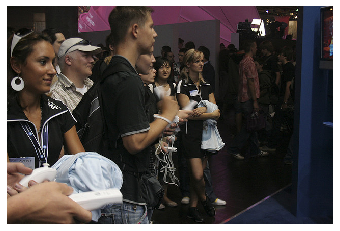

Google: black
Azure: black
Histogram: black
Human: black


In [80]:
for key in list(per_image_colors.keys())[15:]:
    impath = 'static/dataset/coco_val_set/%s'%key
    plt.imshow(Image.open(impath))
    plt.axis('off')
    plt.show()
    print("Google: %s"%color_compiled[key]['google'])
    print("Azure: %s"%color_compiled[key]['azure'])
    print("Histogram: %s"%color_compiled[key]['histogram'])
    print("Human: %s"%per_image_colors[key][0])
    break

In [56]:
# count = 0
# for key in list(multi_label_compiled_with_humans.keys())[211:]:
    
    
#     print(key)
#     google_resp = multi_label_compiled_with_humans[key]['google']
#     max_len = 0
#     for resp in google_resp:
#         if len(resp.split(' ')) > max_len:
#             max_len = len(resp.split(' '))
#     if max_len < 2:
#         plt.imshow(Image.open(impath))
#         plt.axis('off')
#         plt.show()
#         print("Microsoft: " + ",".join(multi_label_compiled_with_humans[key]['azure']))
#         print("Google: " + ",".join(multi_label_compiled_with_humans[key]['google']))
#         print("Detectron: " + ",".join(multi_label_compiled_with_humans[key]['detectron']))
#         print("Rekognition: " + ",".join(multi_label_compiled_with_humans[key]['rekognition']))
#         print("Human: " + ",".join(multi_label_compiled_with_humans[key]['humans'][0]))

#         count += 1
#         if count == 10:
#             break

In [61]:
ct = 0
for i in imagenum:
    if "static/dataset/coco_val_set/%s.jpg"%i not in oneWord.keys():
        google_word = multi_label_compiled['%s.jpg'%i]['rekognition'][0]
        wrong_google_word = multi_label_compiled['%s.jpg'%(int(i)+1)]['rekognition'][0]  
        oneWord['static/dataset/coco_val_set/%s.jpg'%i] = google_word
        wrongWord['static/dataset/coco_val_set/%s.jpg'%i] = wrong_google_word

In [62]:
ct = 0
for i in imagenum:
    if "static/dataset/coco_val_set/%s.jpg"%i not in oneWord.keys():
        ct += 1

In [63]:
ct

0

In [64]:
ct = 0
for i in imagenum:
    if "static/dataset/coco_val_set/%s.jpg"%i not in wrongWord.keys():
        ct += 1

In [65]:
ct

0

In [67]:
print(wrongWord)

{'static/dataset/coco_val_set/2.jpg': 'fire hydrant', 'static/dataset/coco_val_set/5.jpg': 'vase', 'static/dataset/coco_val_set/7.jpg': 'stone', 'static/dataset/coco_val_set/9.jpg': 'door', 'static/dataset/coco_val_set/10.jpg': 'tile floor', 'static/dataset/coco_val_set/11.jpg': 'toilet', 'static/dataset/coco_val_set/12.jpg': 'fruit', 'static/dataset/coco_val_set/15.jpg': 'mountain', 'static/dataset/coco_val_set/16.jpg': 'cloth', 'static/dataset/coco_val_set/17.jpg': 'river', 'static/dataset/coco_val_set/18.jpg': 'skateboard', 'static/dataset/coco_val_set/19.jpg': 'book', 'static/dataset/coco_val_set/23.jpg': 'potted plant', 'static/dataset/coco_val_set/27.jpg': 'toilet', 'static/dataset/coco_val_set/28.jpg': 'laptop', 'static/dataset/coco_val_set/29.jpg': 'curtain', 'static/dataset/coco_val_set/30.jpg': 'bird', 'static/dataset/coco_val_set/32.jpg': 'couch', 'static/dataset/coco_val_set/33.jpg': 'tile floor', 'static/dataset/coco_val_set/34.jpg': 'orange', 'static/dataset/coco_val_set/